In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Combined Dataset/alzheimers_disease_data.csv')
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
# check for duplicate values
data.duplicated().value_counts()

False    2149
Name: count, dtype: int64

In [5]:
# drop unimportaint colums
data.drop(['DoctorInCharge', 'PatientID'], axis=1, inplace=True)

In [6]:
# Split data into different categories for EDA
demographic = ['Age', 'Gender', 'Ethnicity', 'EducationLevel']
lifestyle = ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
medical_history = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
clinical = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
cognitive_functional = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']
symptoms = ['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
categorical_columns = ['Smoking','FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
basic_info = ['Gender', 'Ethnicity', 'EducationLevel']

In [7]:
df = data.copy()

# Turn numeric code to categorical values for EDA
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df['Ethnicity'] = df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})  # Caucasian: Người da trắng (gốc Châu Âu), African American: Người da đen (gốc Phi)
df['EducationLevel'] = df['EducationLevel'].replace({0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'})
df[categorical_columns] = df[categorical_columns].replace({0: 'No', 1: 'Yes'})

categorical_columns = basic_info + categorical_columns

# EDA

### Statistics of Numerical Features

In [8]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


### Distribution of Numerical Features

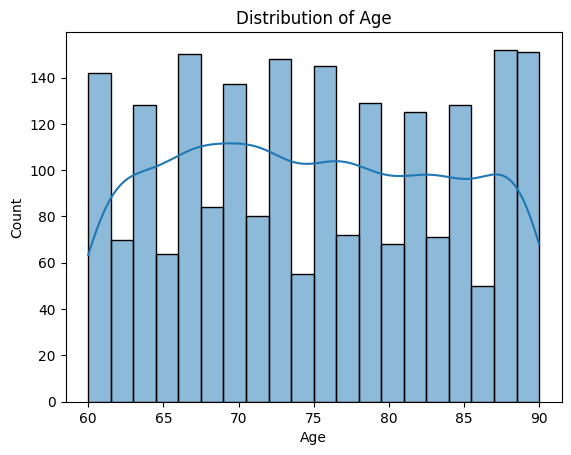

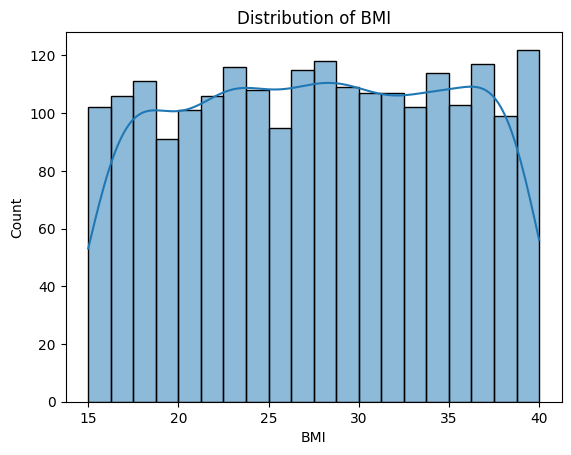

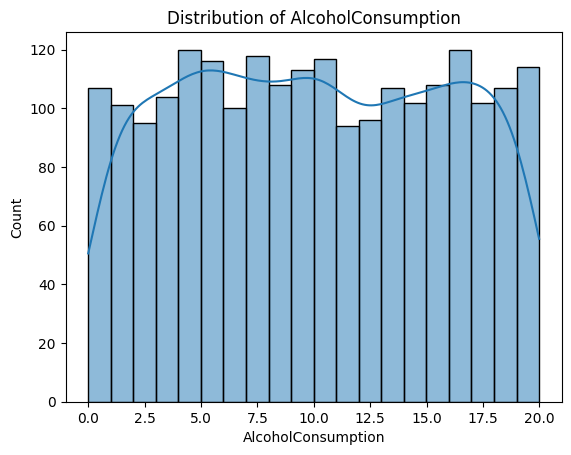

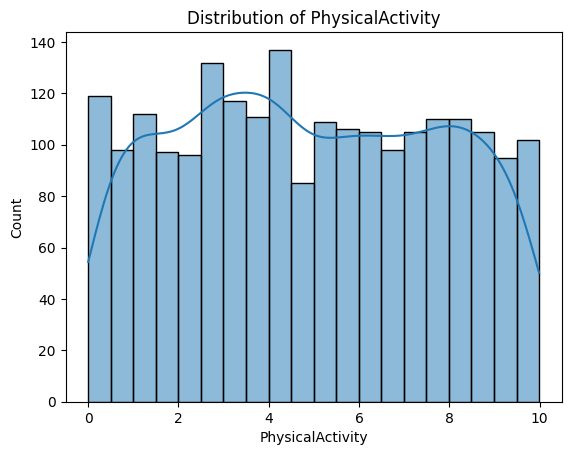

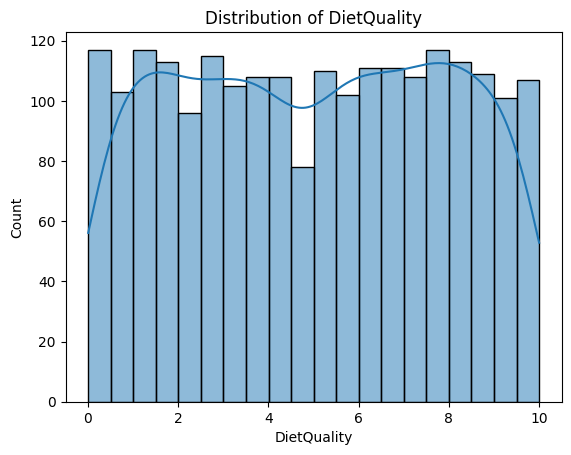

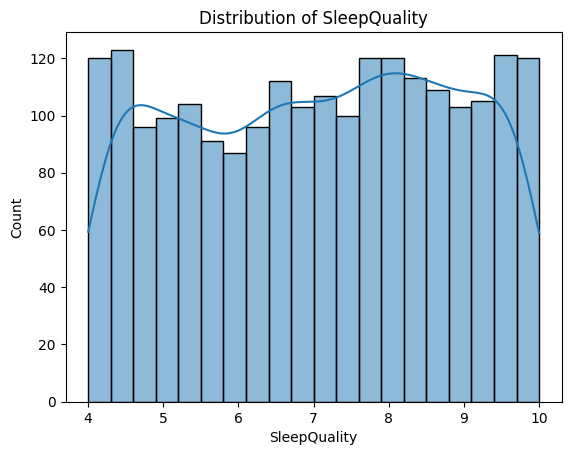

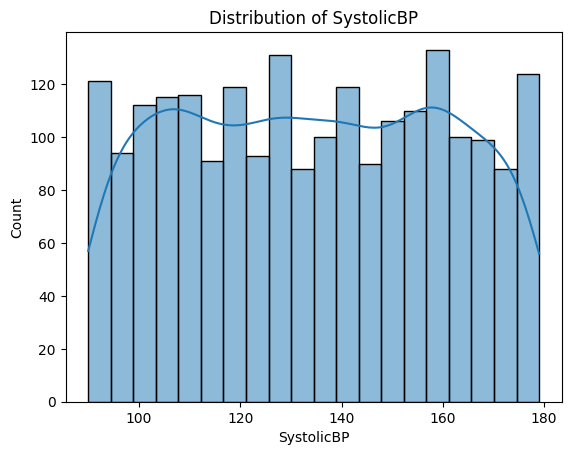

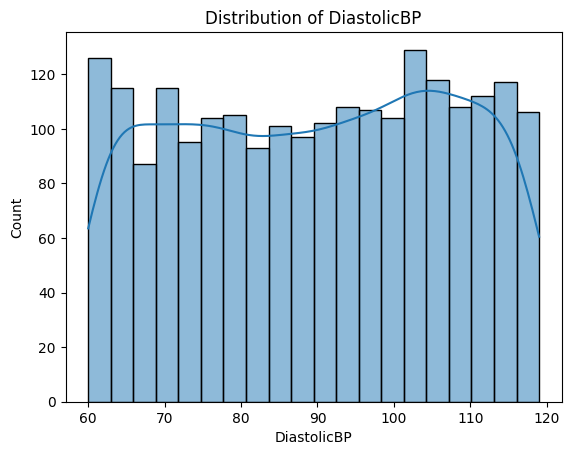

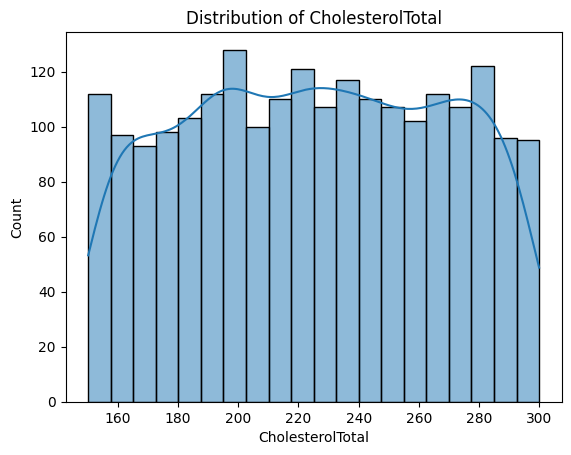

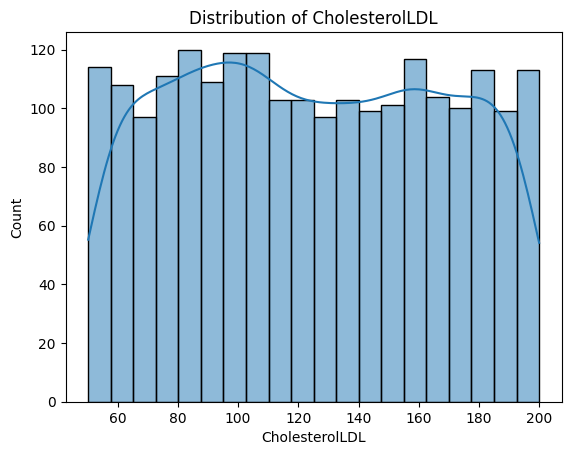

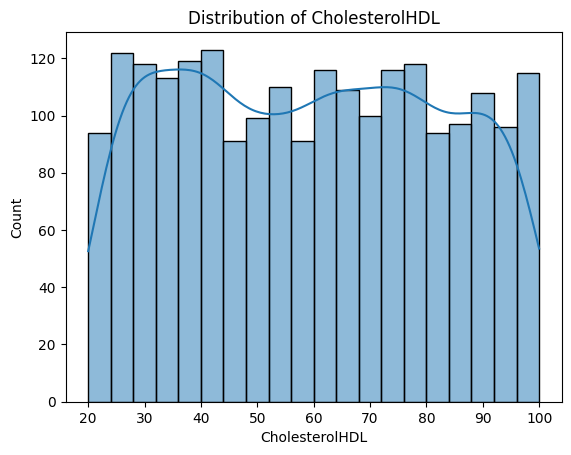

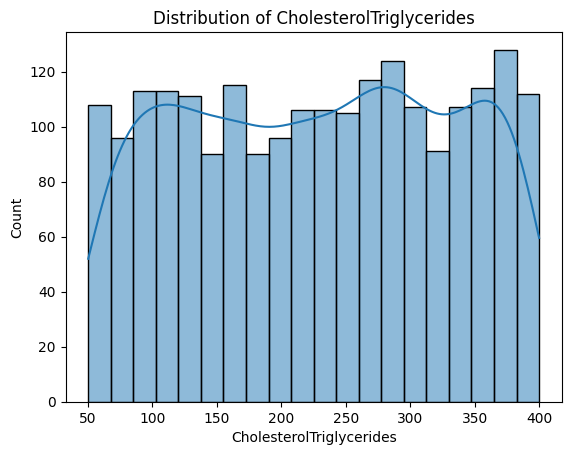

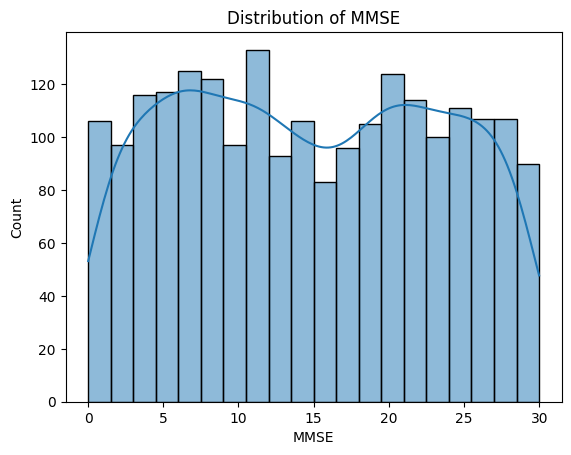

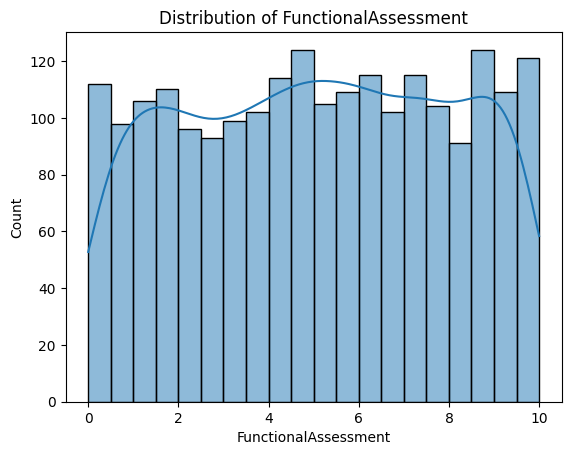

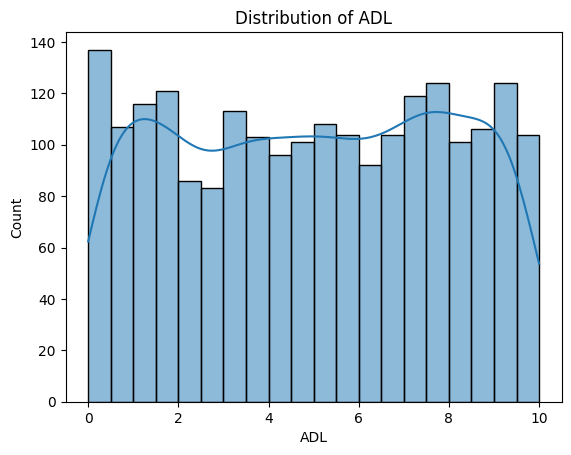

In [9]:
for col in numerical_columns:
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

### Distribution of Categorical Features

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


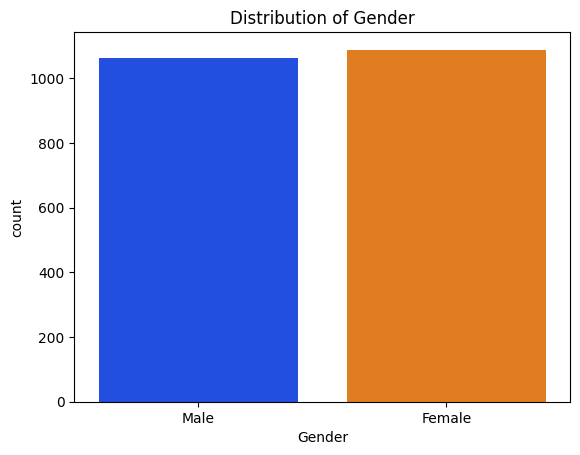

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


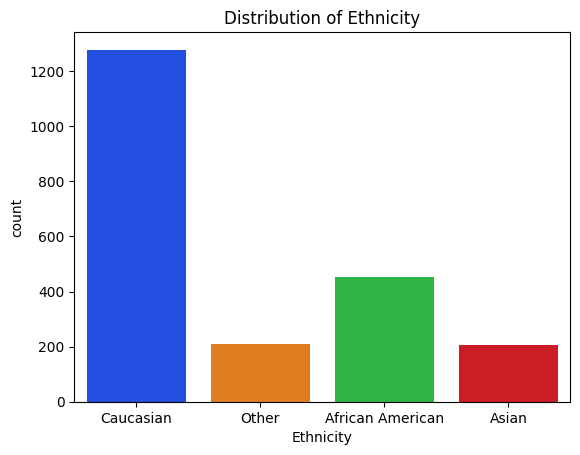

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


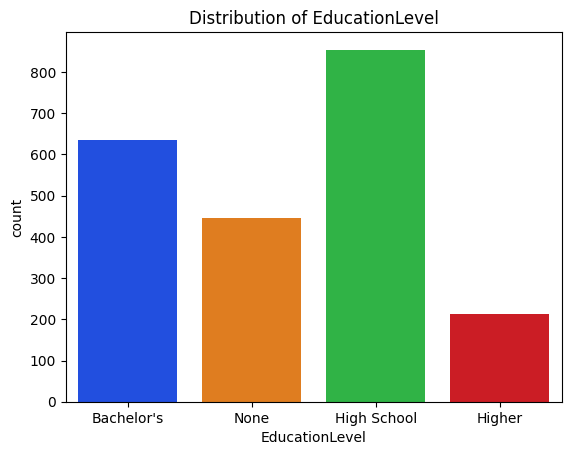

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


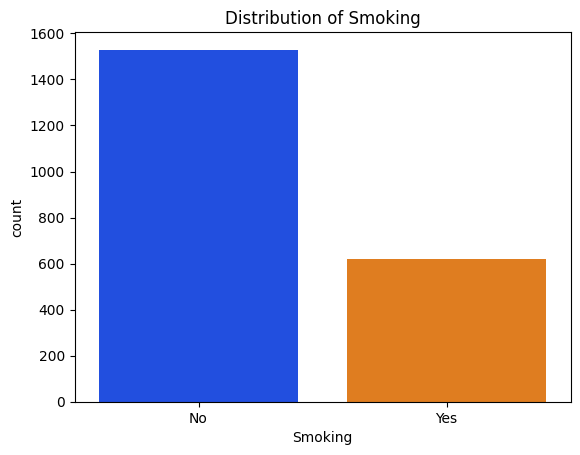

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


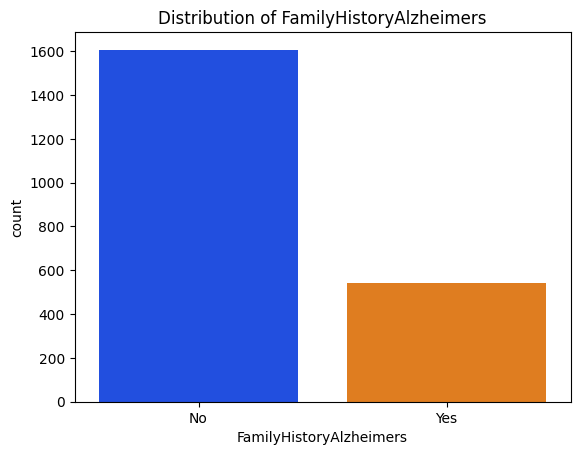

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


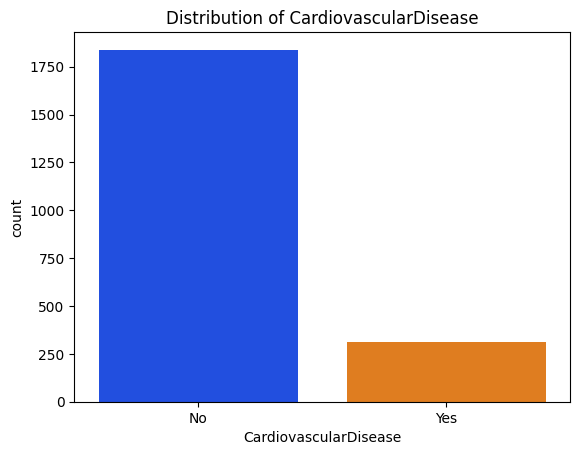

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


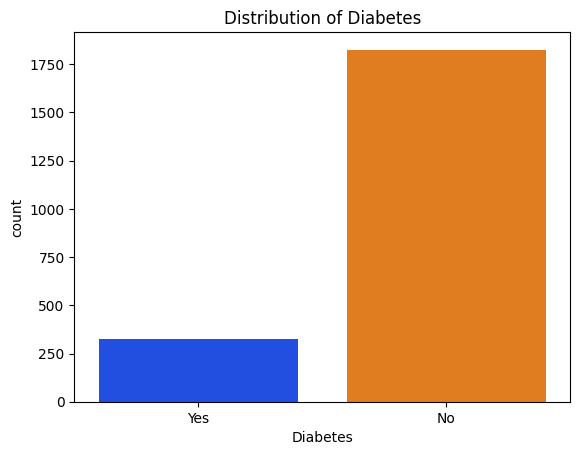

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


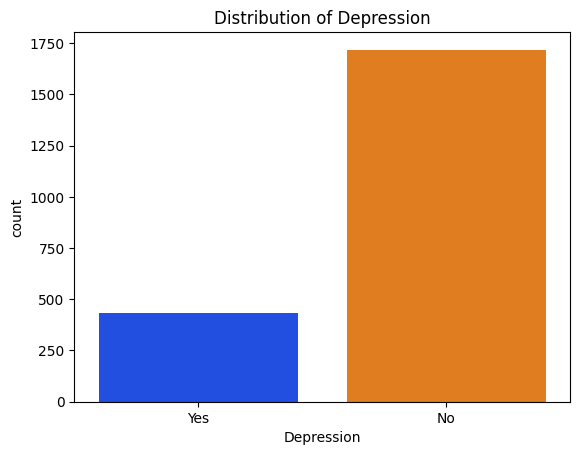

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


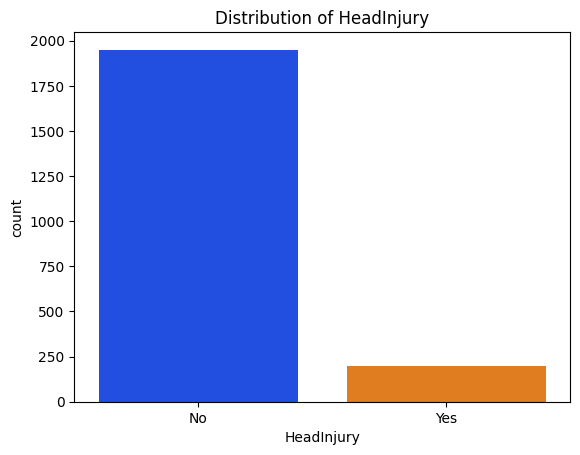

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


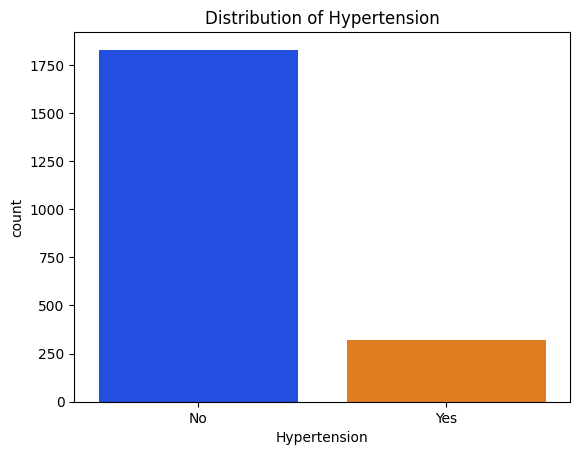

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


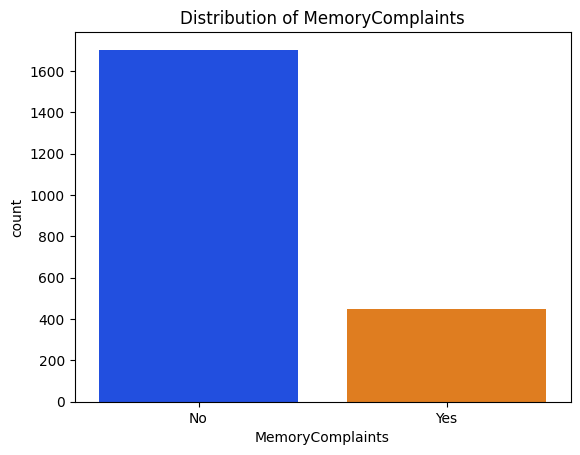

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


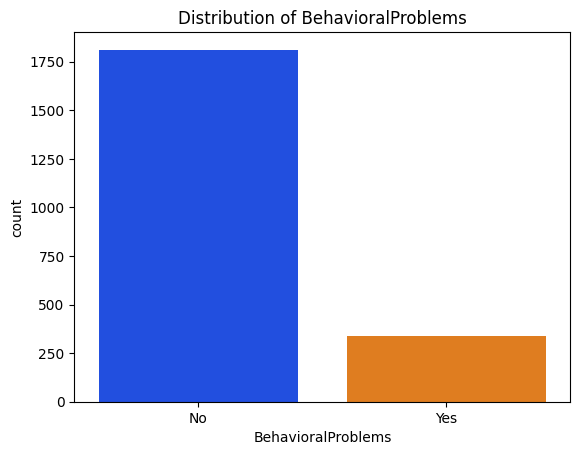

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


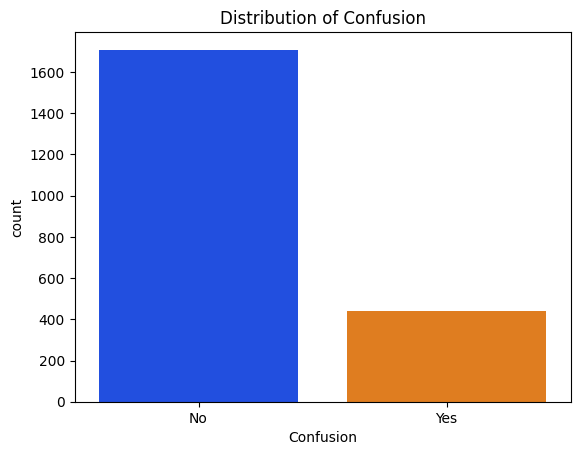

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


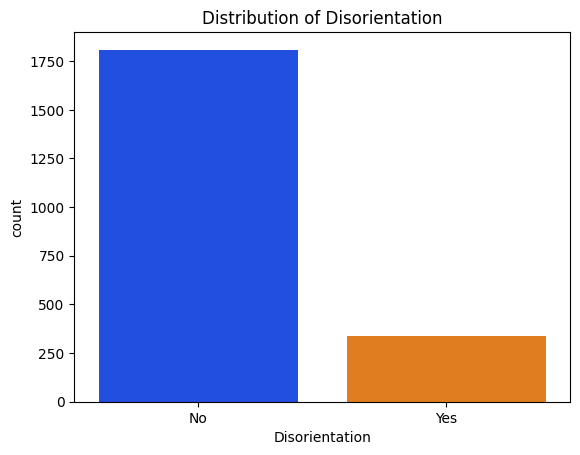

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


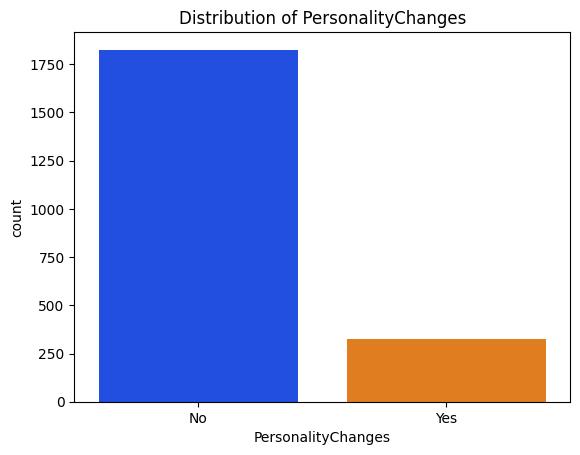

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


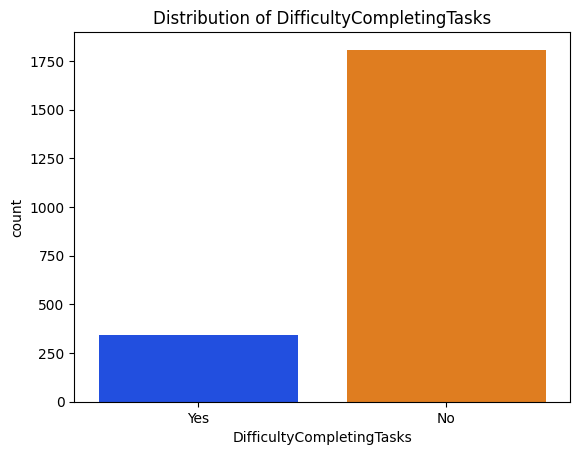

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


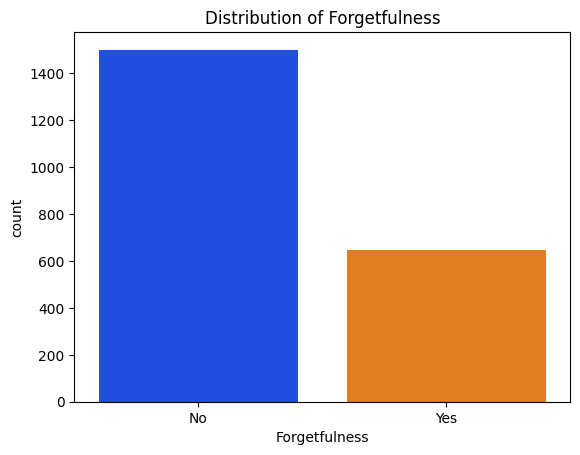

In [10]:
for col in categorical_columns:
    sns.countplot(data=df, x=col, palette='bright')
    plt.title(f"Distribution of {col}")
    plt.show()

### Analysis of Demographic Factors

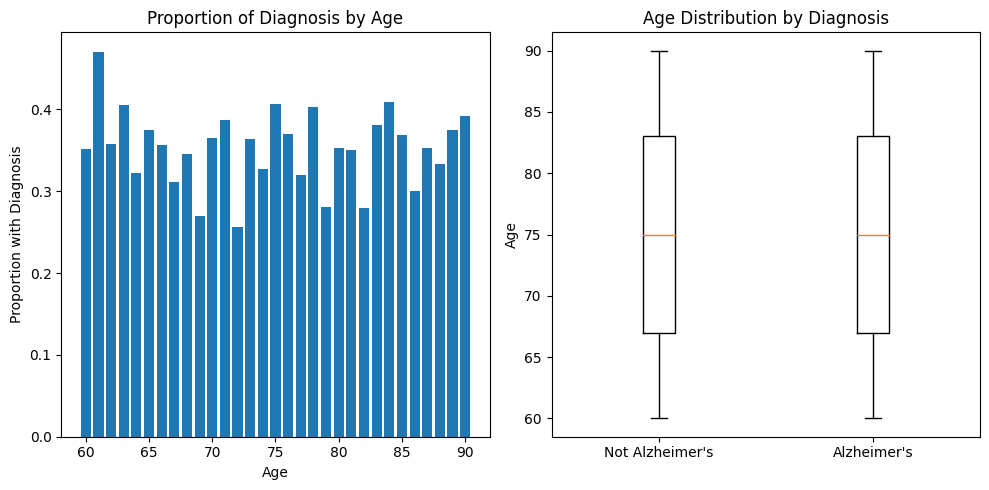

In [11]:
# Analysis of the impact of age
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
age_proportion = df.groupby('Age')['Diagnosis'].mean()
plt.bar(age_proportion.index, age_proportion.values)
plt.title('Proportion of Diagnosis by Age')
plt.xlabel('Age')
plt.ylabel('Proportion with Diagnosis')

plt.subplot(1,2,2)
plt.boxplot([data[data['Diagnosis'] == 0]['Age'], data[data['Diagnosis'] == 1]['Age']],labels=["Not Alzheimer's", "Alzheimer's"])
plt.ylabel('Age')
plt.title('Age Distribution by Diagnosis')
plt.tight_layout()
plt.show()

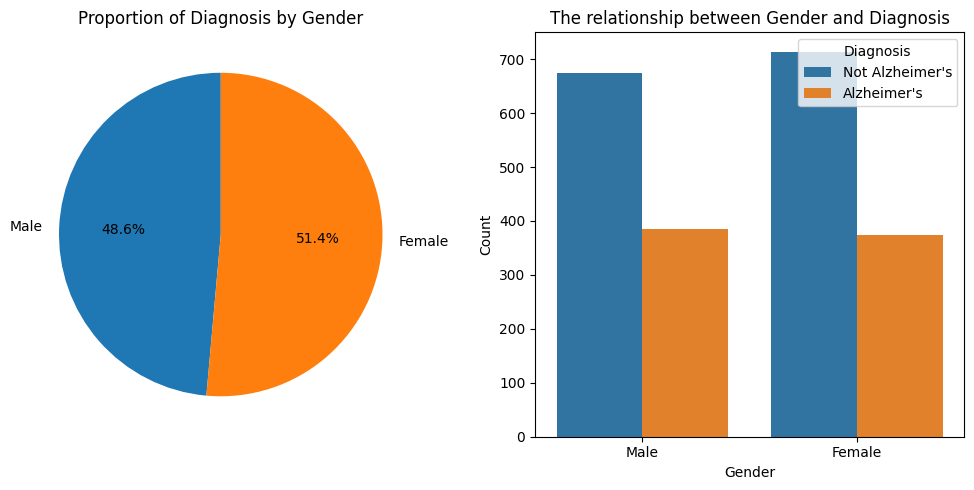

In [12]:
# Analysis of the impact of gender
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
gender_proportion = df.groupby('Gender')['Diagnosis'].mean()
plt.pie(gender_proportion, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diagnosis by Gender')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Gender', hue='Diagnosis')
plt.title('The relationship between Gender and Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=["Not Alzheimer's", "Alzheimer's"])

plt.tight_layout()
plt.show()

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\2015004303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_proportion.index, y=ethnicity_proportion.values, palette='Set2')


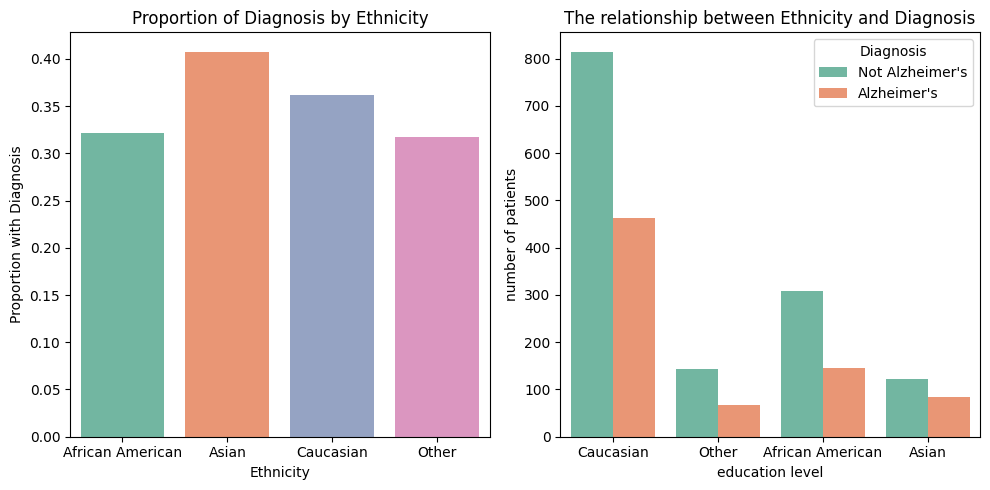

In [13]:
# Analysis of the impact of ethnicity
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ethnicity_proportion = df.groupby('Ethnicity')['Diagnosis'].mean()
sns.barplot(x=ethnicity_proportion.index, y=ethnicity_proportion.values, palette='Set2')
plt.xlabel('Ethnicity')
plt.ylabel('Proportion with Diagnosis')
plt.title('Proportion of Diagnosis by Ethnicity')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Ethnicity', hue='Diagnosis', palette='Set2')
plt.xlabel('education level')
plt.ylabel('number of patients')
plt.title('The relationship between Ethnicity and Diagnosis')
plt.legend(title='Diagnosis', labels=["Not Alzheimer's", "Alzheimer's"])

plt.tight_layout()
plt.show()

C:\Users\HanDong\AppData\Local\Temp\ipykernel_6564\3441529003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_proportion.index, y=education_proportion.values, palette='Set2')


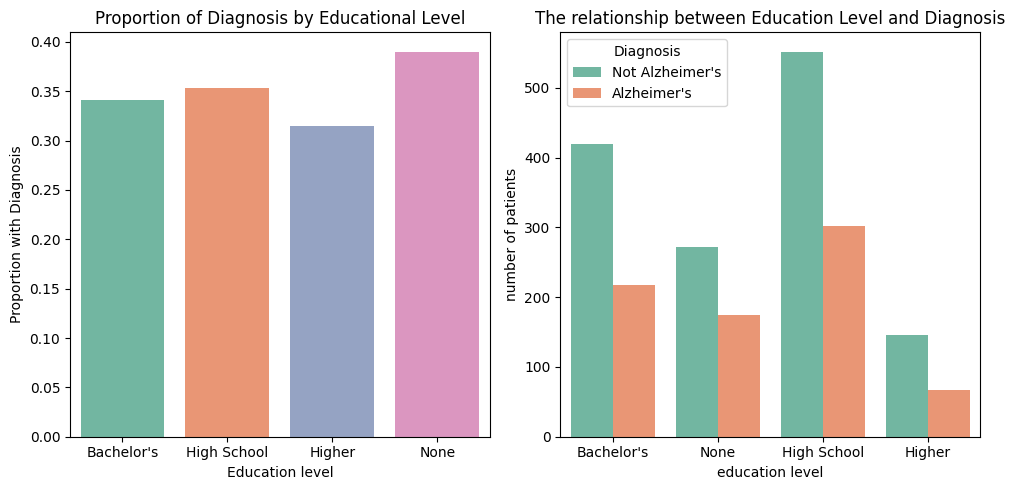

In [14]:
# Analysis of the impact of education level
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
education_proportion = df.groupby('EducationLevel')['Diagnosis'].mean()
sns.barplot(x=education_proportion.index, y=education_proportion.values, palette='Set2')
plt.xlabel('Education level')
plt.ylabel('Proportion with Diagnosis')
plt.title('Proportion of Diagnosis by Educational Level')

plt.subplot(1,2,2)
sns.countplot(data=df, x='EducationLevel', hue='Diagnosis', palette='Set2')
plt.xlabel('education level')
plt.ylabel('number of patients')
plt.title('The relationship between Education Level and Diagnosis')
plt.legend(title='Diagnosis', labels=["Not Alzheimer's", "Alzheimer's"])

plt.tight_layout()
plt.show()

### Analysis of Lifestyle Factors

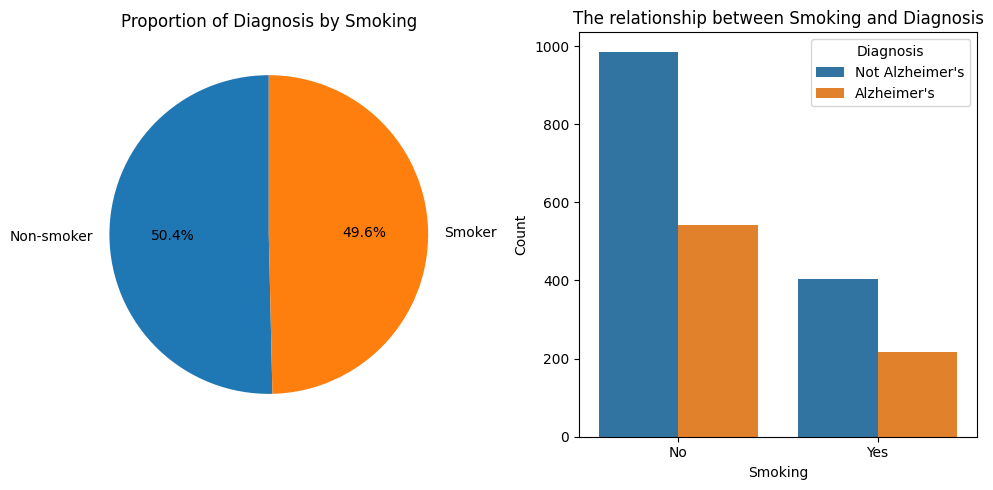

In [15]:
# Analysis of the impact of smoking
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
smoking_proportion = df.groupby('Smoking')['Diagnosis'].mean()
plt.pie(smoking_proportion, labels=['Non-smoker', 'Smoker'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diagnosis by Smoking')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Smoking', hue='Diagnosis')
plt.title('The relationship between Smoking and Diagnosis')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=["Not Alzheimer's", "Alzheimer's"])

plt.tight_layout()
plt.show()

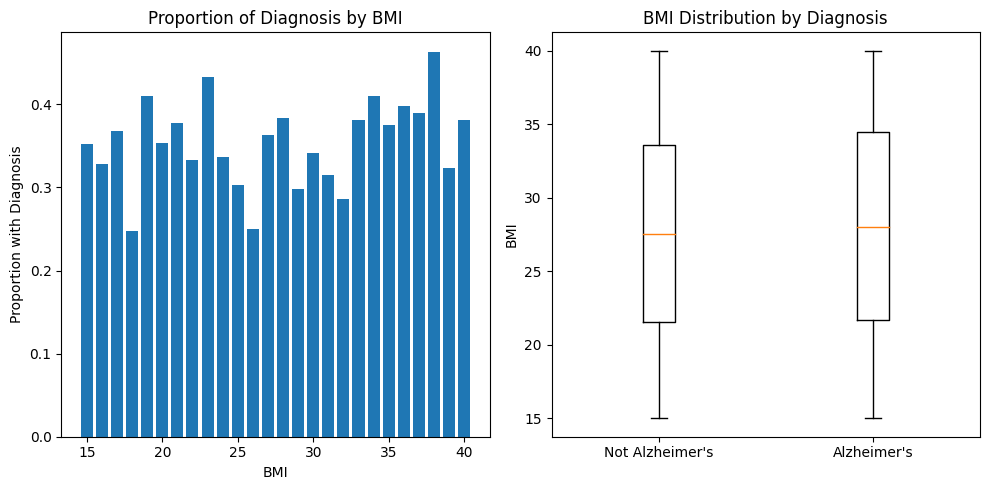

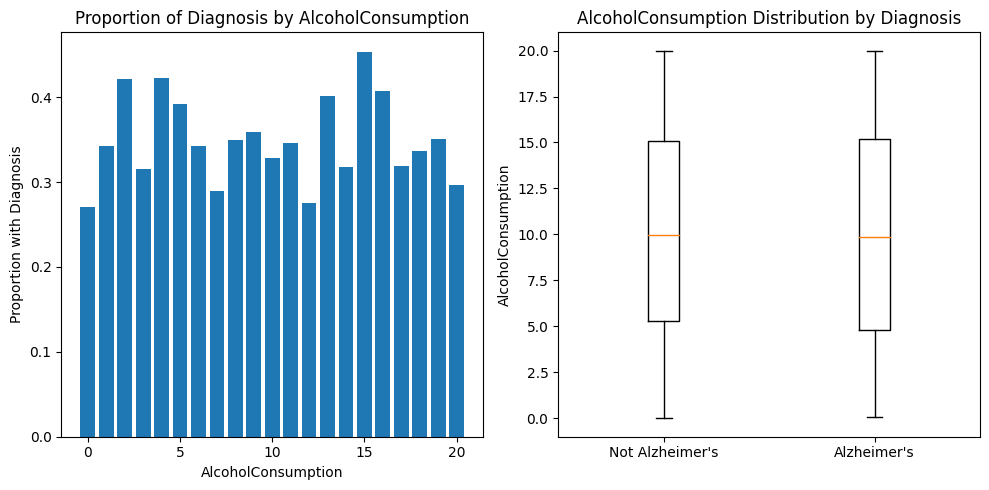

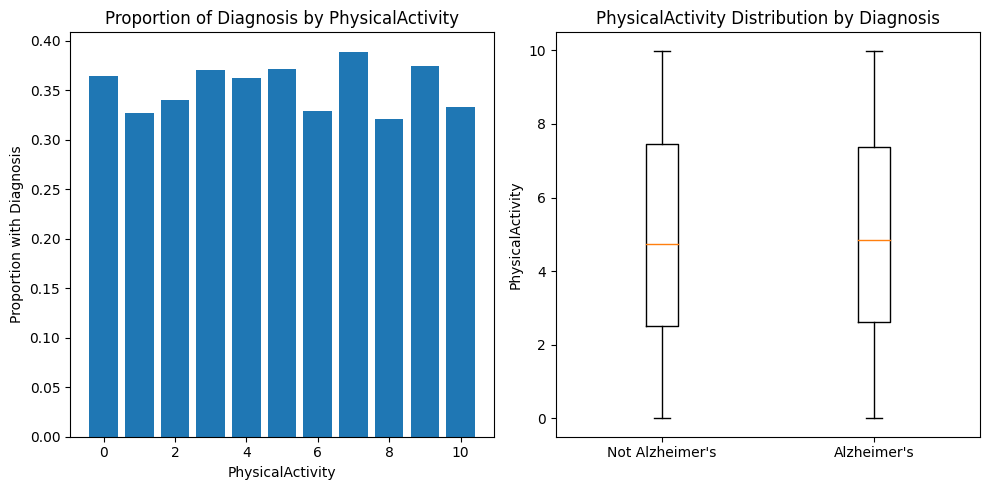

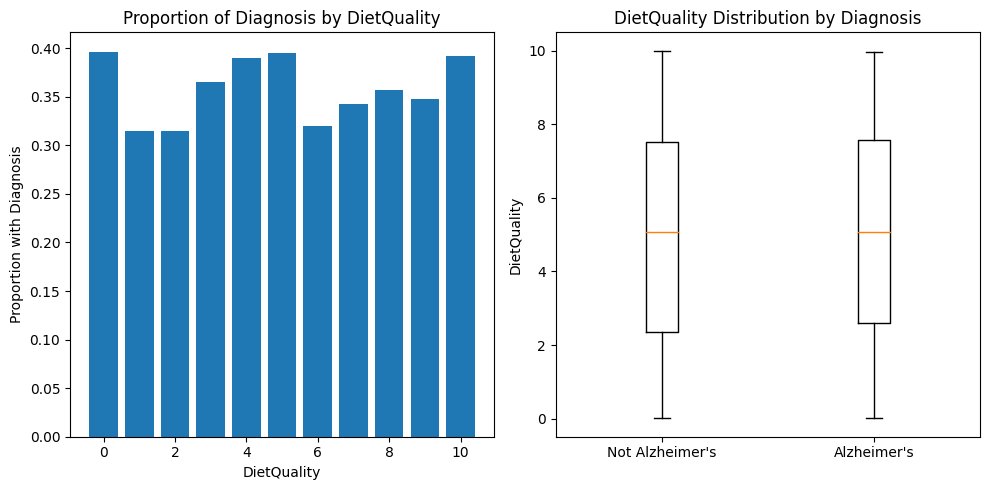

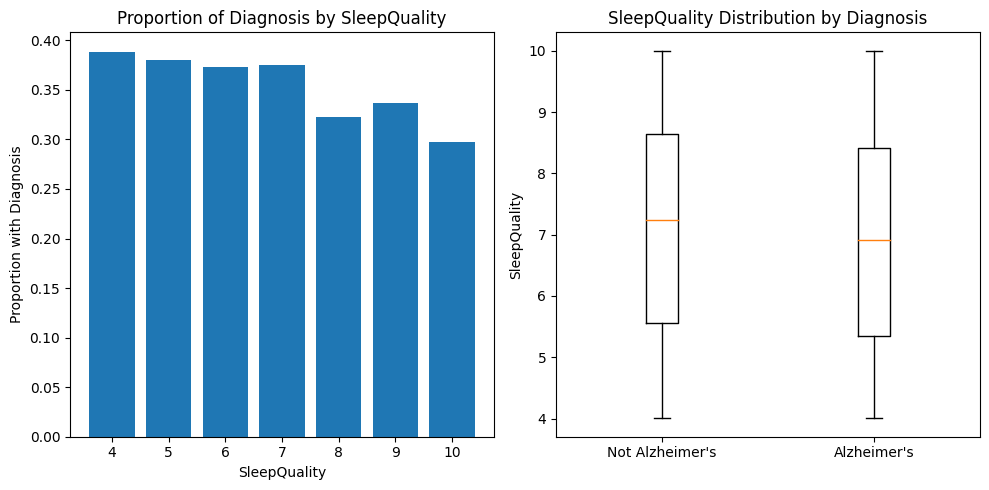

In [16]:
df[numerical_columns] = df[numerical_columns].round()

for col in ['BMI','AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    proportion = df.groupby(col)['Diagnosis'].mean()
    plt.bar(proportion.index, proportion.values)
    plt.xlabel(col)
    plt.ylabel('Proportion with Diagnosis')
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    plt.boxplot([data[data['Diagnosis'] == 0][col], data[data['Diagnosis'] == 1][col]],labels=["Not Alzheimer's", "Alzheimer's"])
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Diagnosis')

    plt.tight_layout()
    plt.show()

### Analysis of Medical History

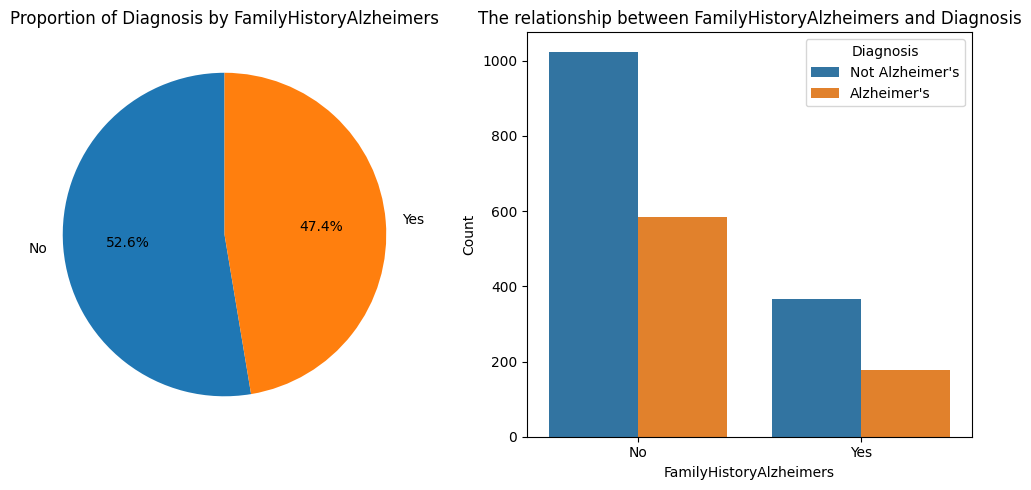

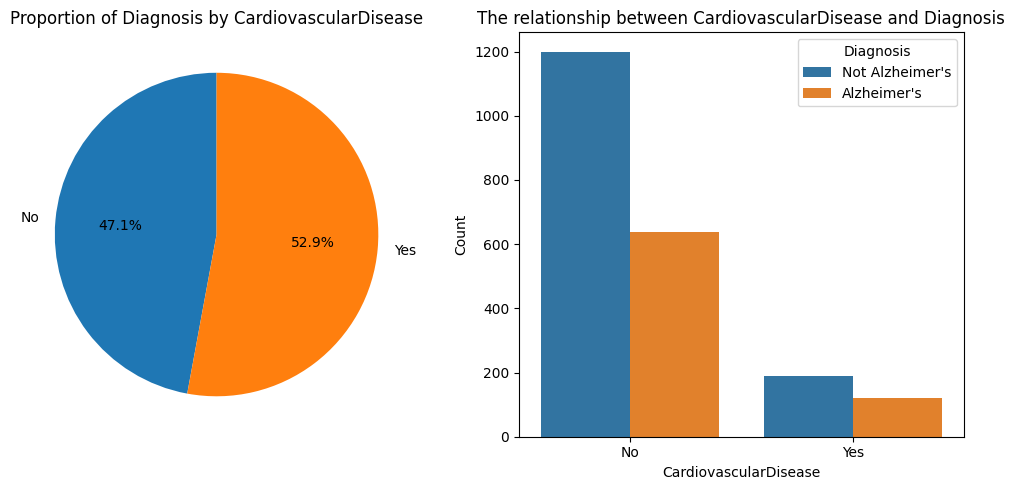

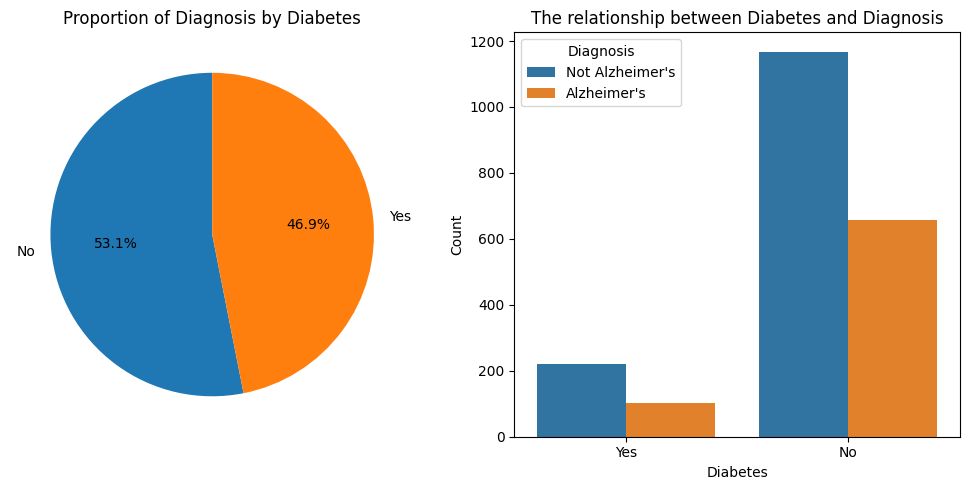

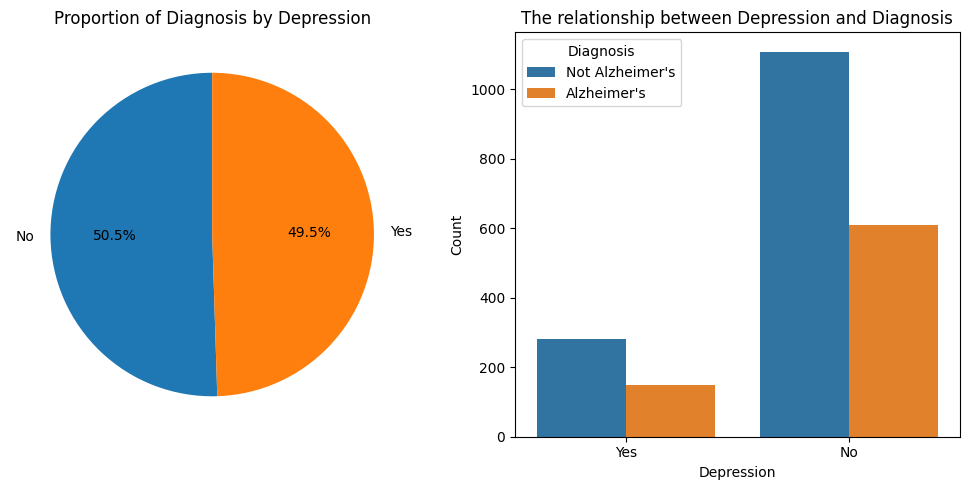

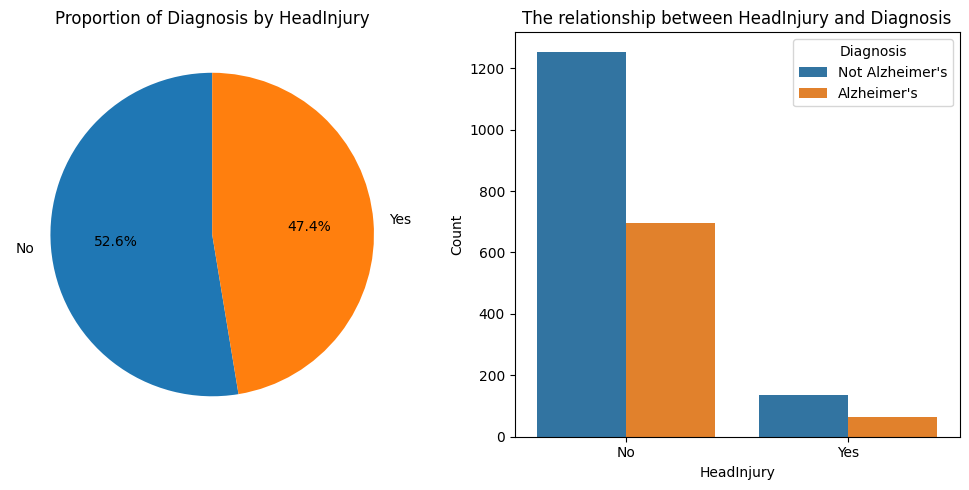

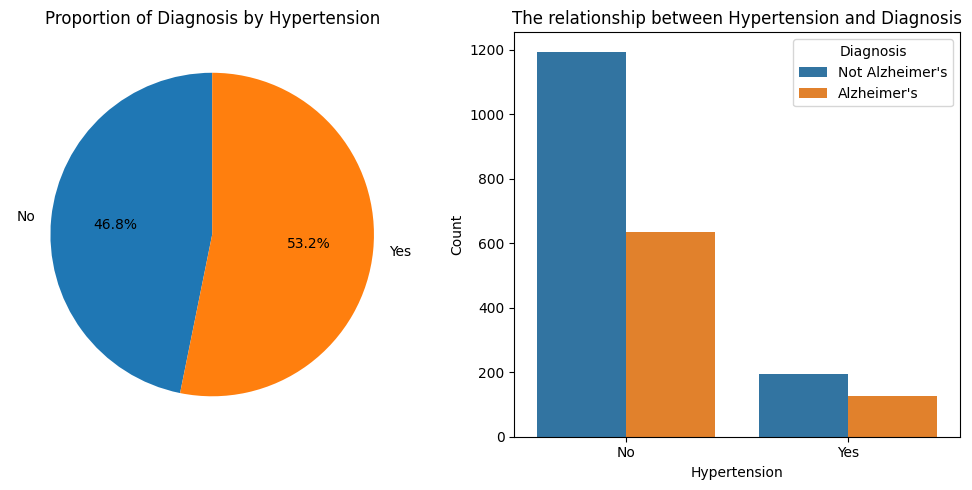

In [17]:
for col in medical_history:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    diagnosis_proportion = data.groupby(col)['Diagnosis'].mean()
    plt.pie(diagnosis_proportion, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f'The relationship between {col} and Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=["Not Alzheimer's", "Alzheimer's"])

    plt.tight_layout()
    plt.show()

### Analysis of Clinical Measurements

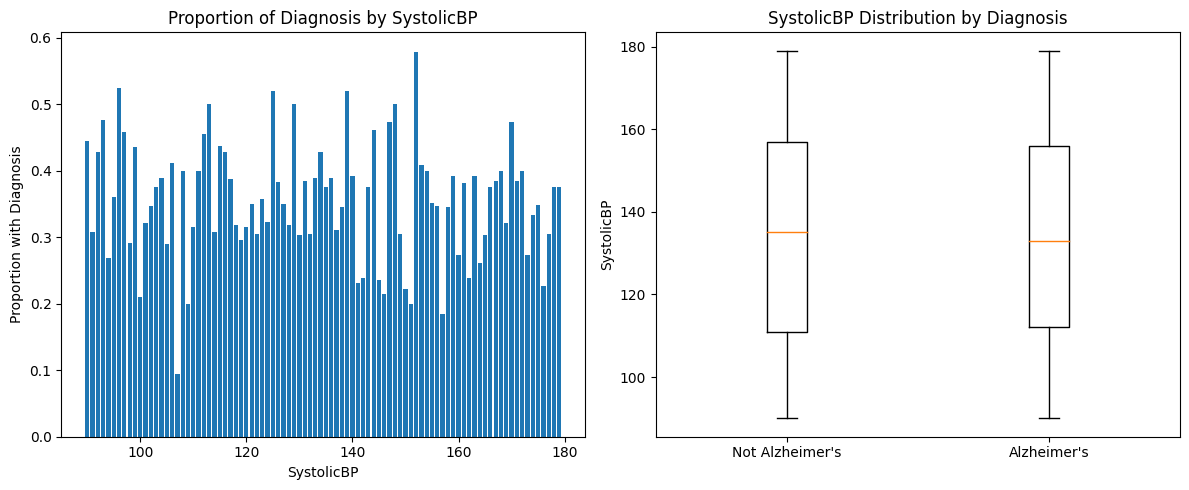

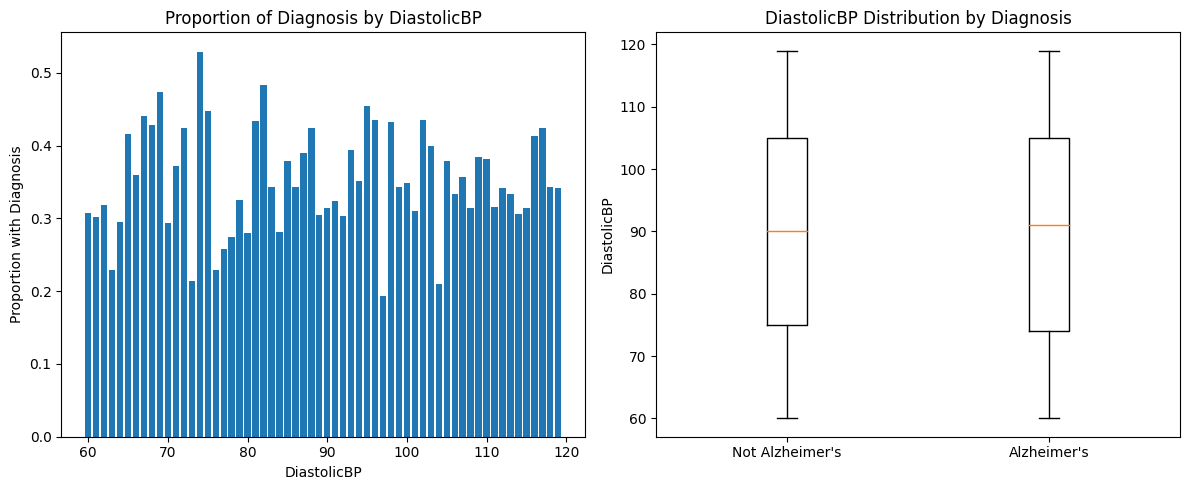

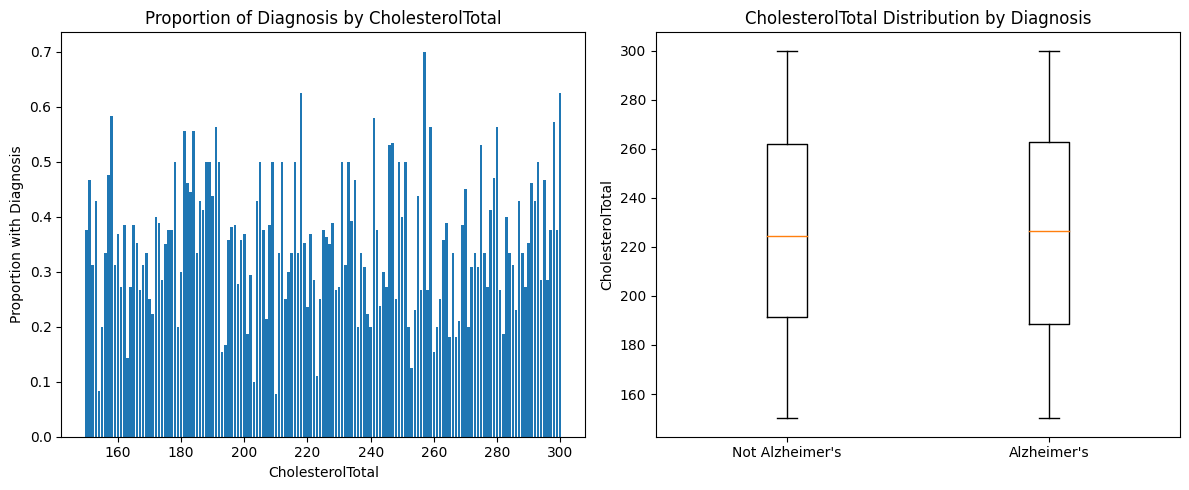

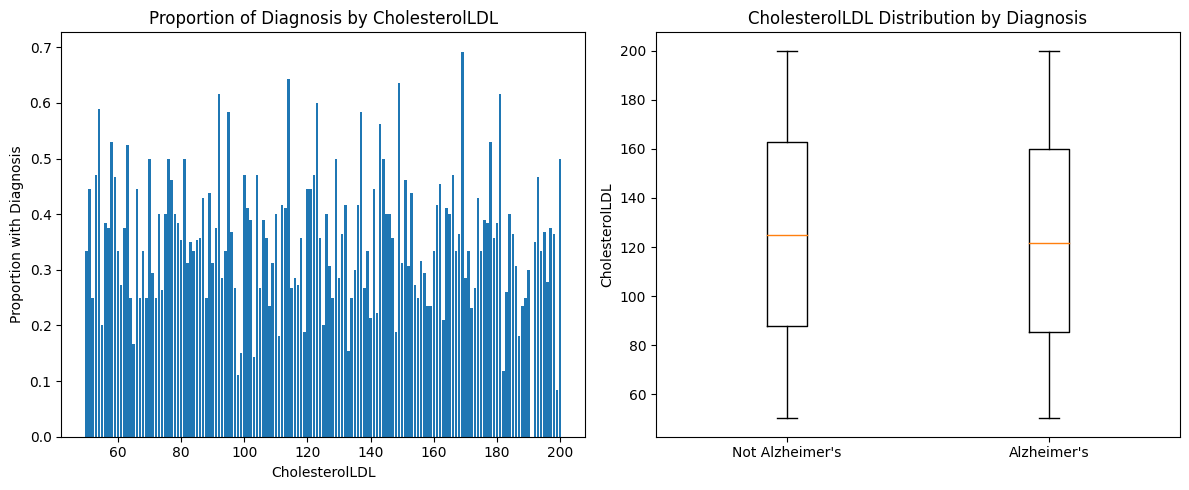

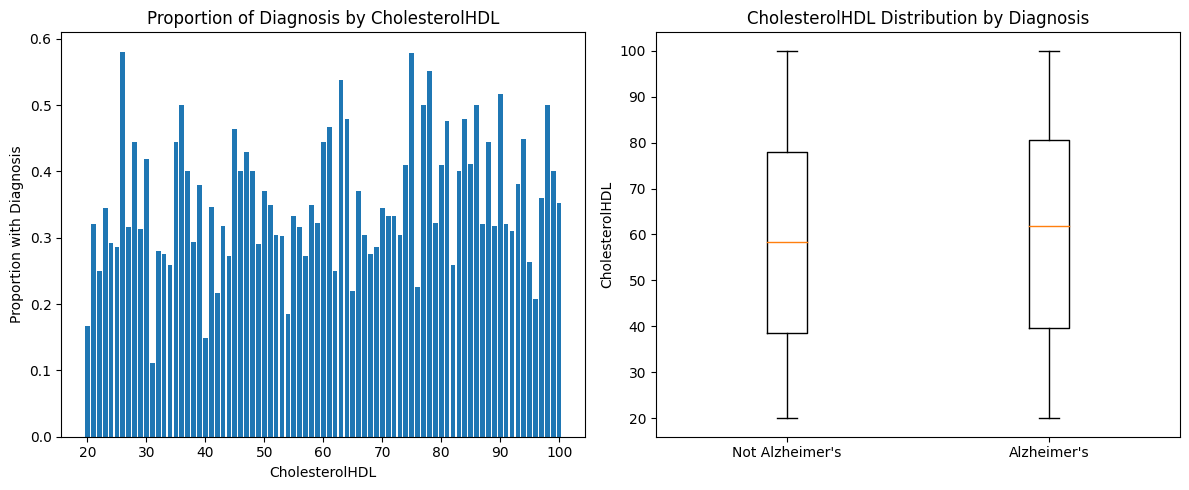

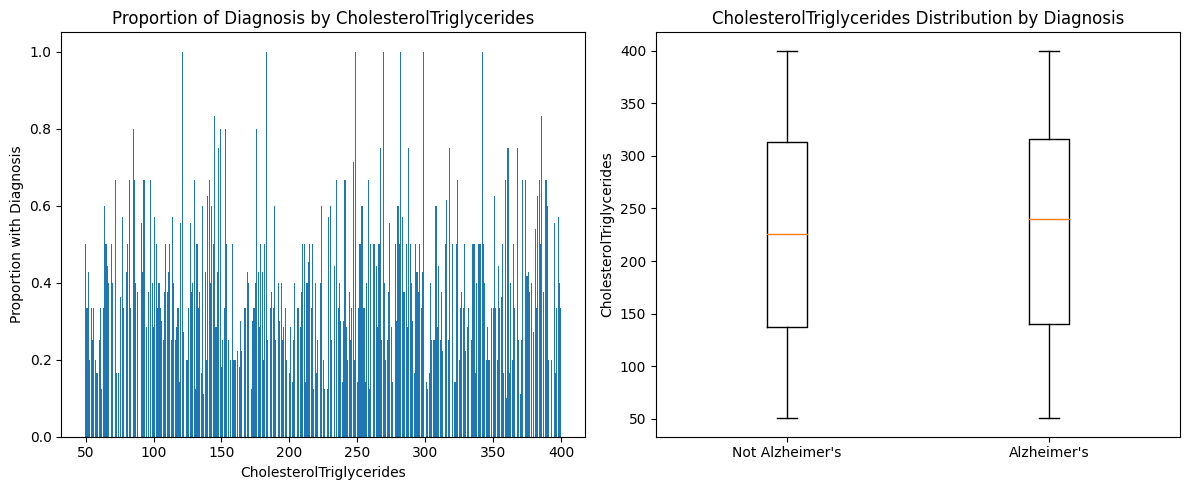

In [18]:
for col in clinical:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    proportion = df.groupby(col)['Diagnosis'].mean()
    plt.bar(proportion.index, proportion.values)
    plt.xlabel(col)
    plt.ylabel('Proportion with Diagnosis')
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    plt.boxplot([data[data['Diagnosis'] == 0][col], data[data['Diagnosis'] == 1][col]],labels=["Not Alzheimer's", "Alzheimer's"])
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Diagnosis')

    plt.tight_layout()
    plt.show()

### Analysis of Cognitive and Functional Assessments

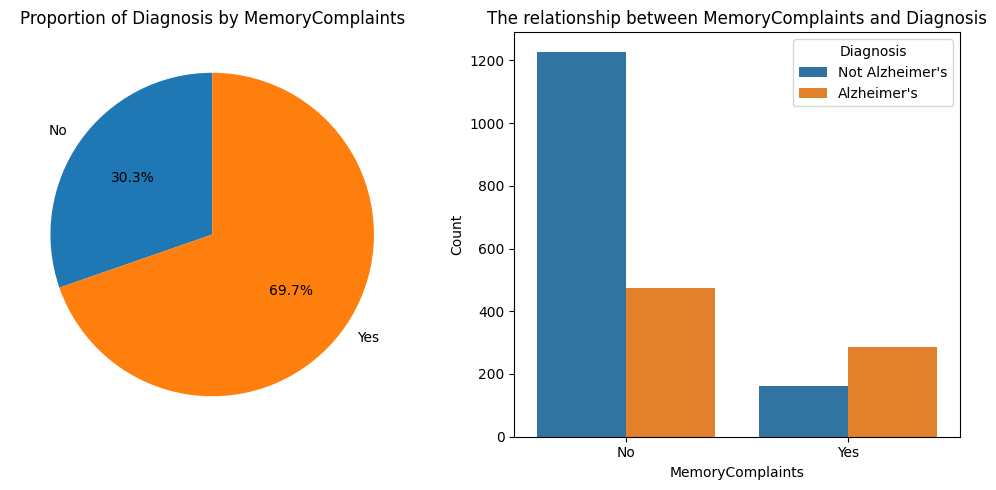

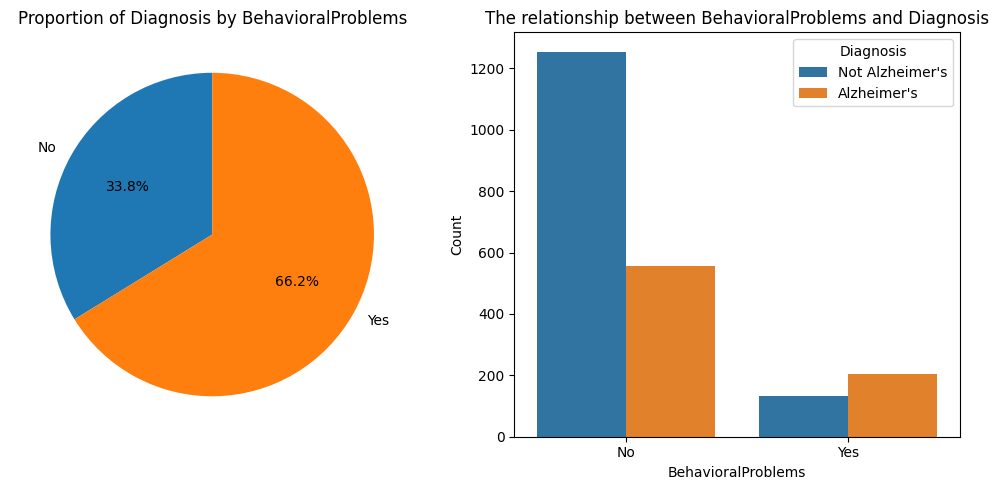

In [19]:
# Analysis of the impact of memory complaints
for col in ['MemoryComplaints', 'BehavioralProblems']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    diagnosis_proportion = data.groupby(col)['Diagnosis'].mean()
    plt.pie(diagnosis_proportion, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f'The relationship between {col} and Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=["Not Alzheimer's", "Alzheimer's"])

    plt.tight_layout()
    plt.show()

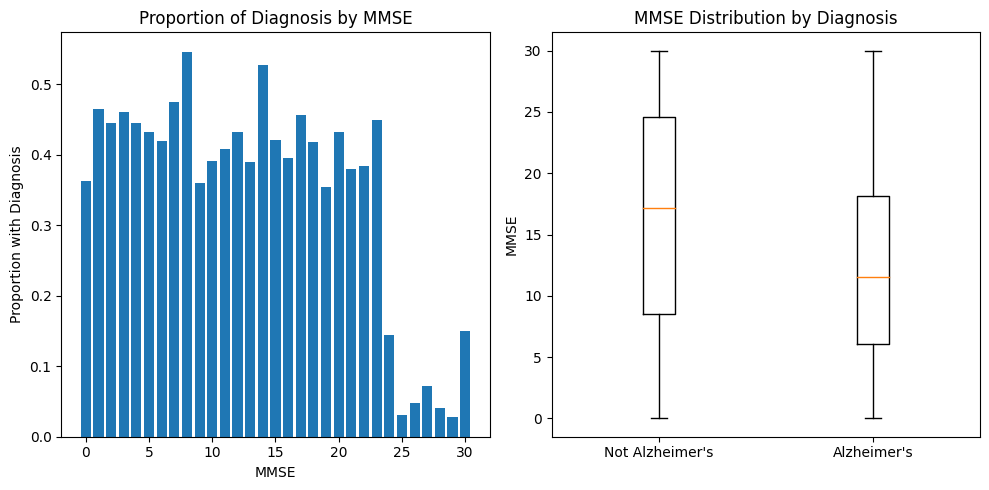

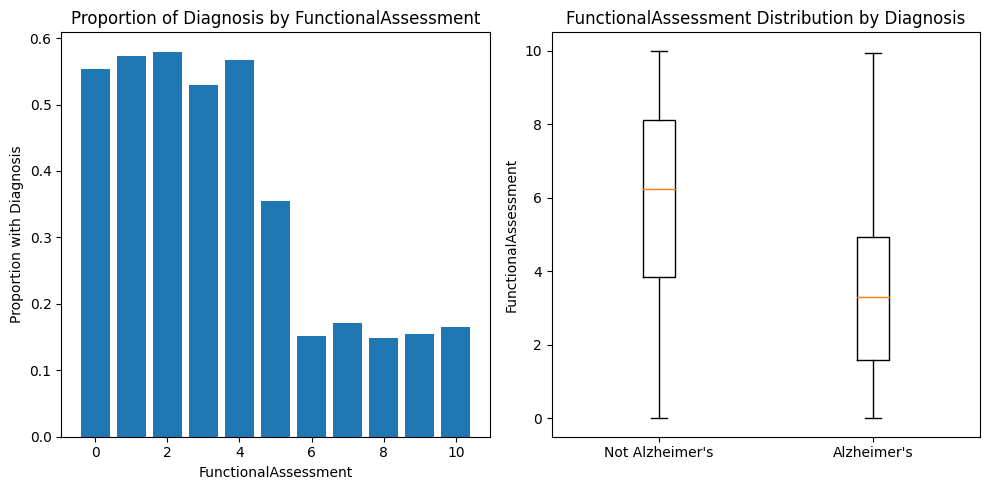

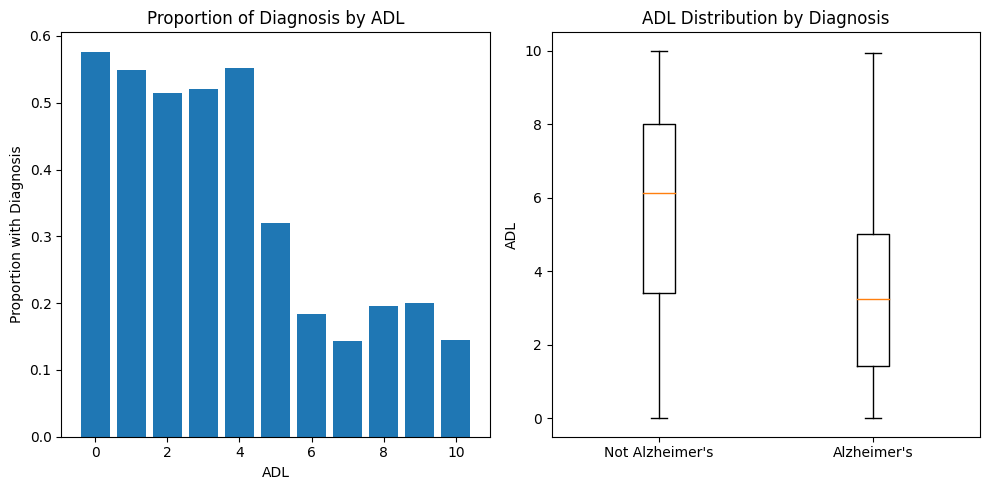

In [20]:
for col in ['MMSE', 'FunctionalAssessment', 'ADL']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    proportion = df.groupby(col)['Diagnosis'].mean()
    plt.bar(proportion.index, proportion.values)
    plt.xlabel(col)
    plt.ylabel('Proportion with Diagnosis')
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    plt.boxplot([data[data['Diagnosis'] == 0][col], data[data['Diagnosis'] == 1][col]],labels=["Not Alzheimer's", "Alzheimer's"])
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Diagnosis')

    plt.tight_layout()
    plt.show()

### Analysis of Symptoms

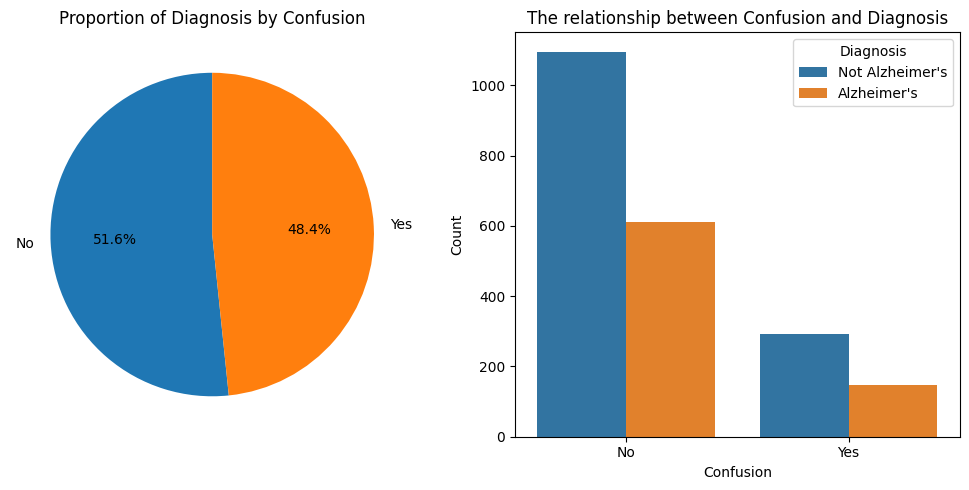

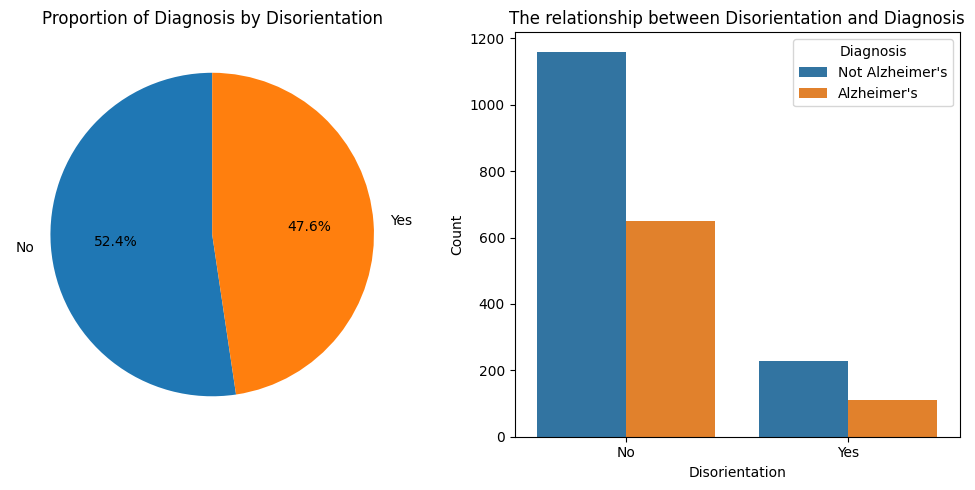

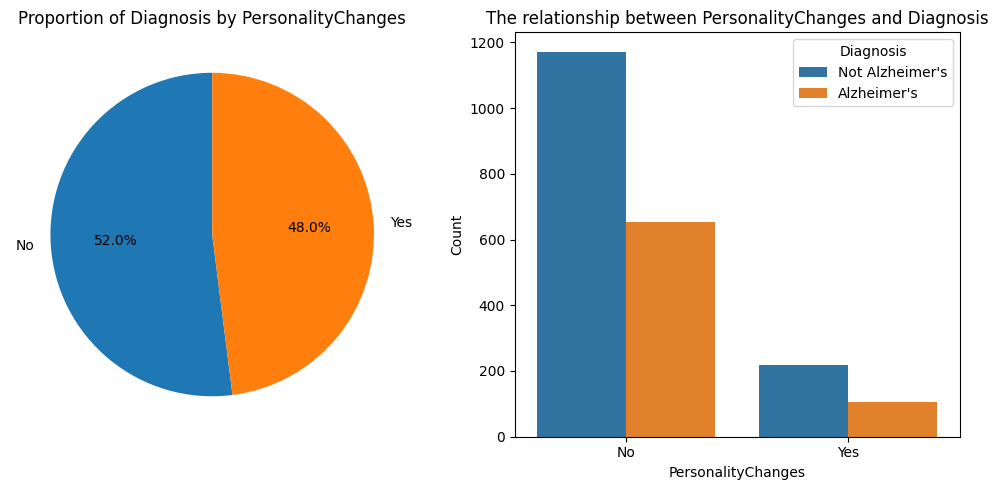

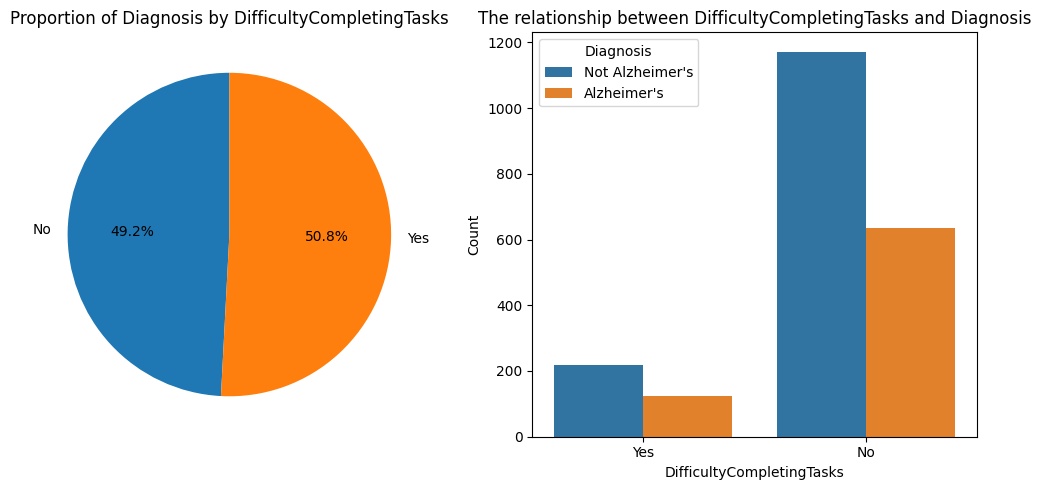

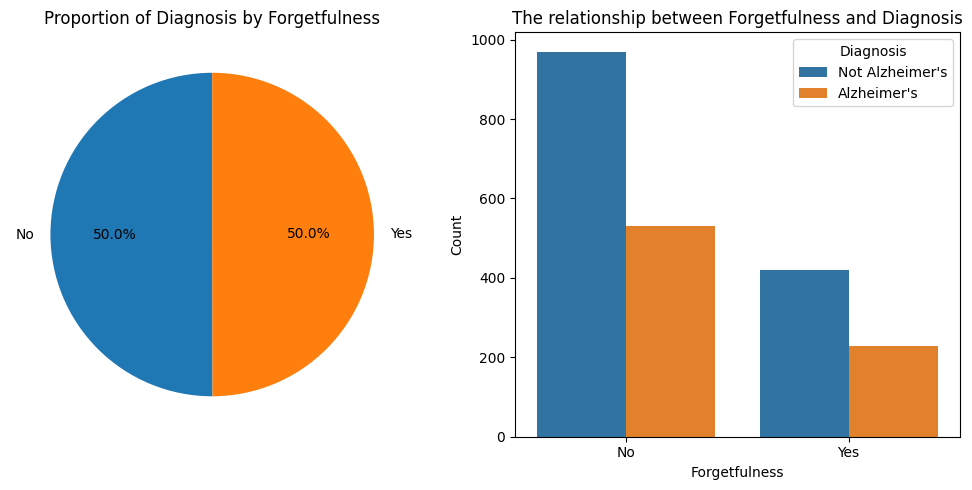

In [21]:
for col in symptoms:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    diagnosis_proportion = data.groupby(col)['Diagnosis'].mean()
    plt.pie(diagnosis_proportion, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f'The relationship between {col} and Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=["Not Alzheimer's", "Alzheimer's"])

    plt.tight_layout()
    plt.show()

### Target Variable

Text(0.5, 1.0, 'Proportion of Diagnosis')

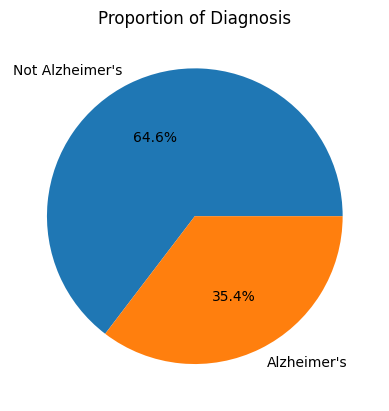

In [22]:
plt.pie(data['Diagnosis'].value_counts(), labels=["Not Alzheimer's", "Alzheimer's"], autopct='%1.1f%%', startangle=0)
plt.title('Proportion of Diagnosis')

## Correlation matrix

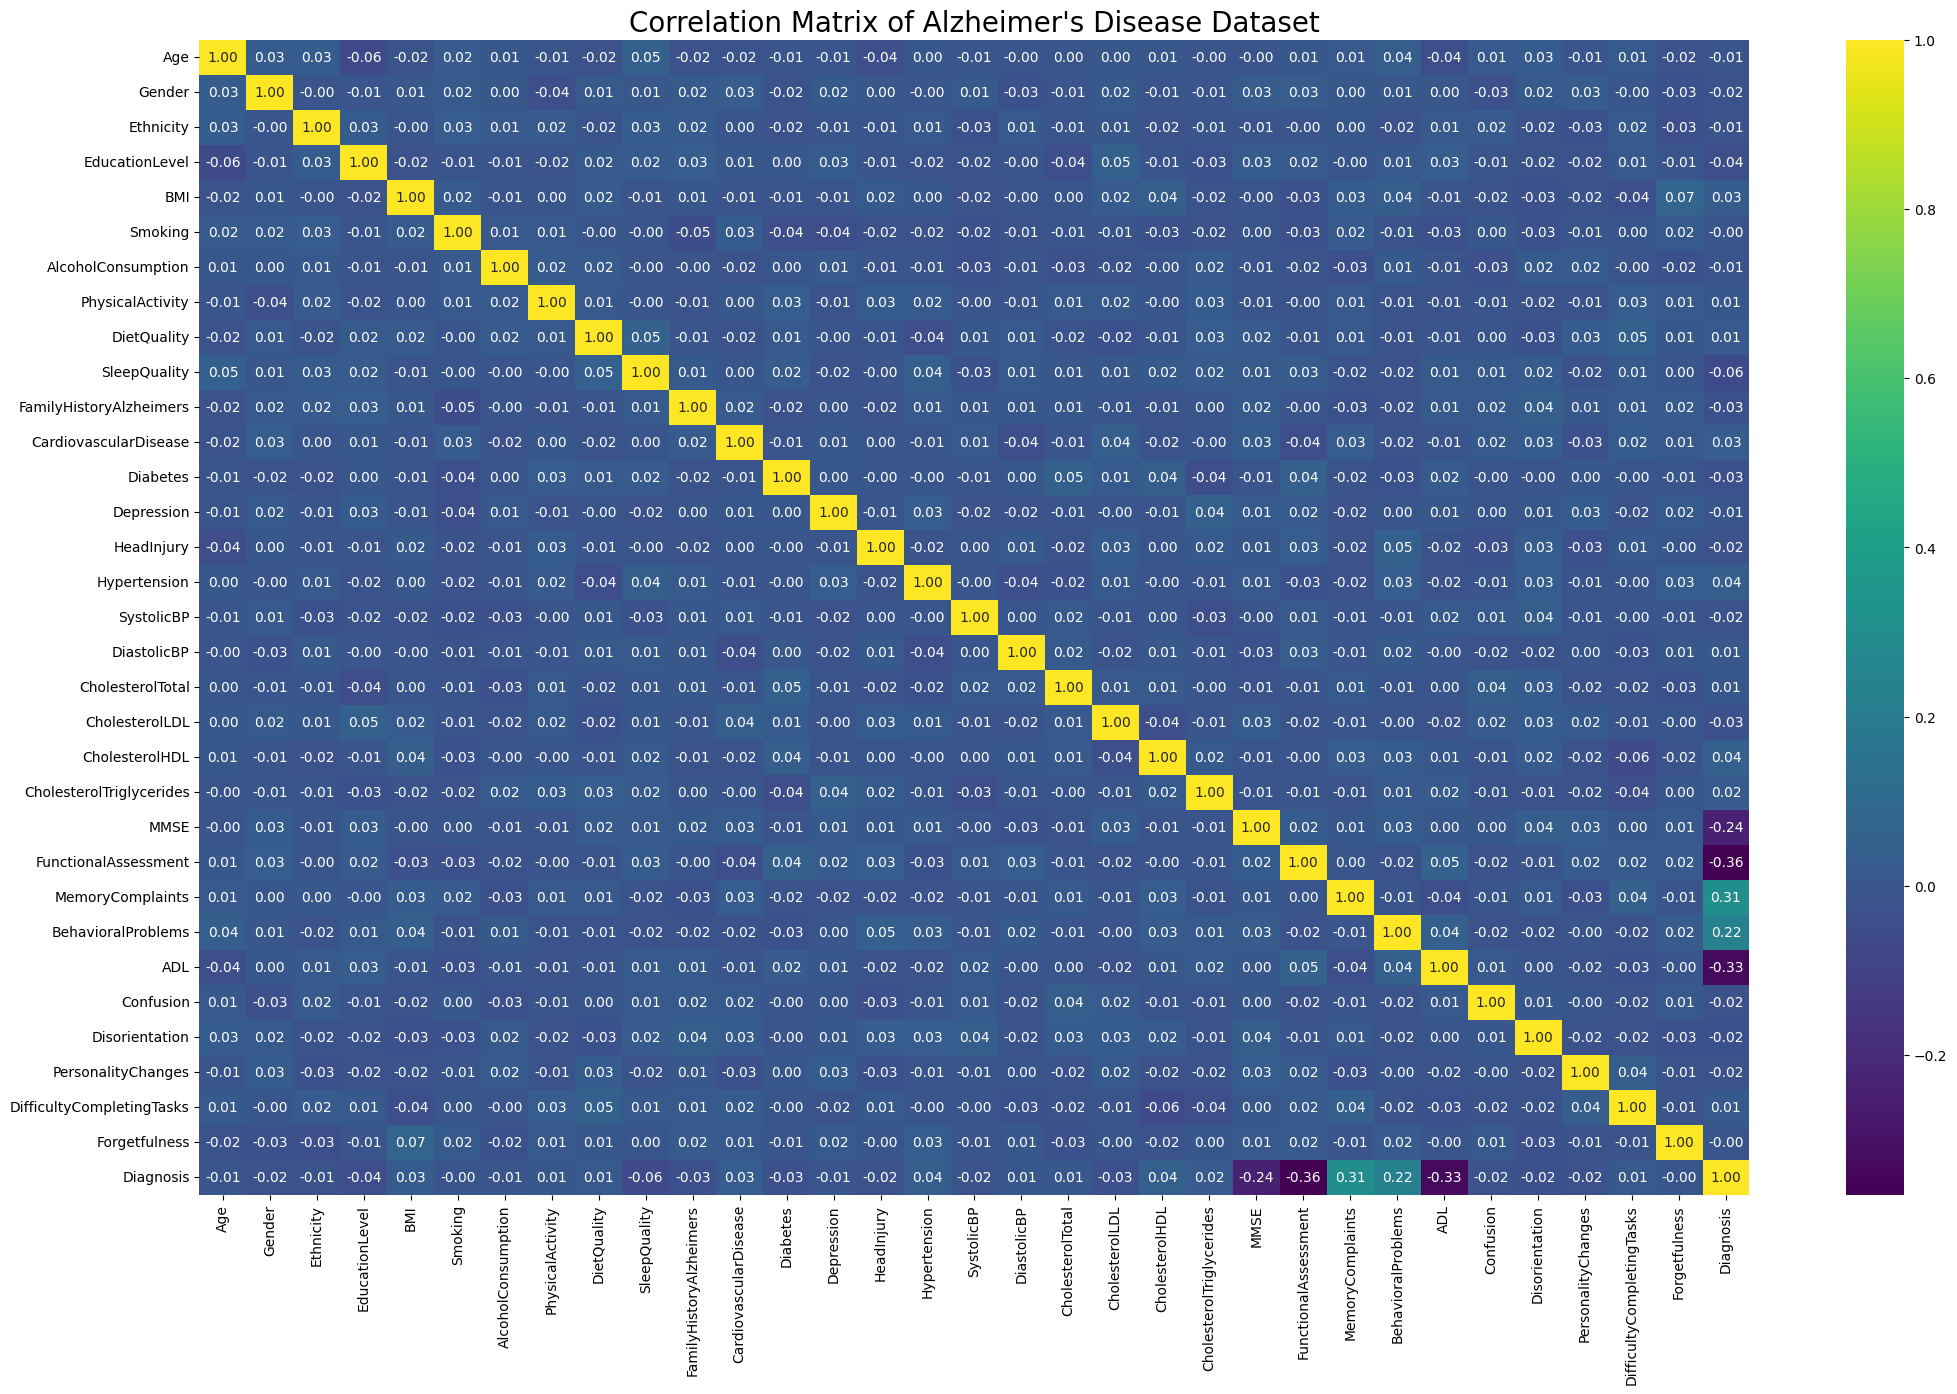

In [23]:
correlation_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix of Alzheimer's Disease Dataset", fontsize=20)
plt.show()

# Training

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost

X = data.drop(['Diagnosis'], axis = 1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(1719, 32)
(430, 32)


### Decision Tree

Base Decision Tree model cross-validation scores: [0.89534884 0.90406977 0.91569767 0.90116279 0.89504373]
Mean cross-validation accuracy: 0.9023 ± 0.0075

Best parameters found: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9441
Decision Tree test accuracy: 0.9302

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       277
           1       0.93      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



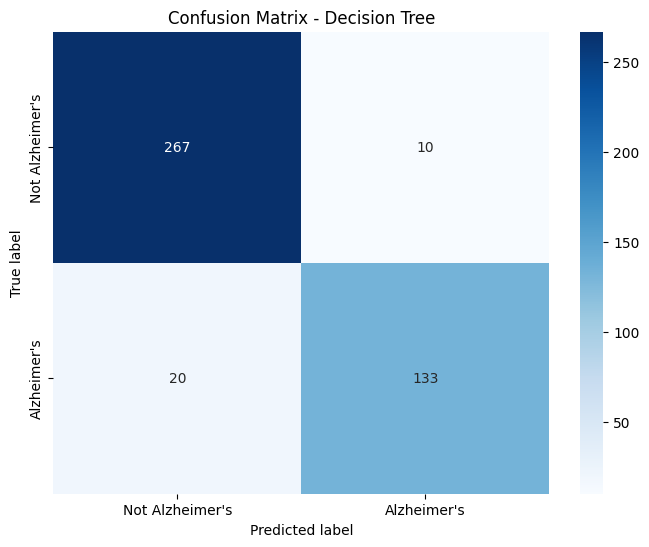

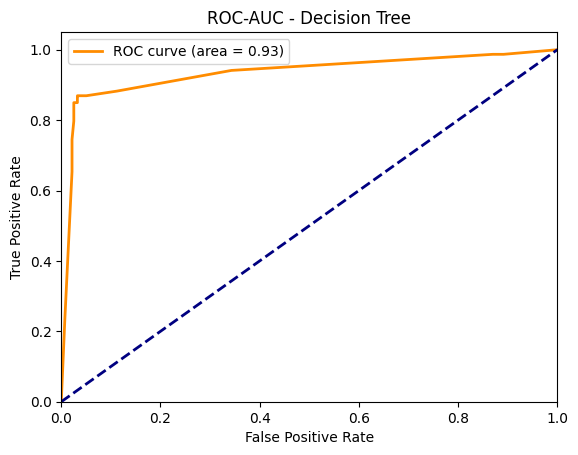

In [25]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform cross-validation on the base model
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print(f"Base Decision Tree model cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Define the parameter grid to search
grid_parameters={
    'max_depth': [3, 5, 10, None],     # Tree depth
    'min_samples_split': [2, 5, 10],   # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]      # Min samples in a leaf node
}

# Set up GridSearchCV with 5-fold cross-validation
dt_grid_search=GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid= grid_parameters,
    scoring='accuracy',   # Evaluate performance using accuracy score
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1             # Use all available processors to run in parallel
)
# Fit the grid search to the data
dt_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters found:", dt_grid_search.best_params_)
print(f"Best cross-validation accuracy: {dt_grid_search.best_score_:.4f}")

# Get the best model
best_dt = dt_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt.predict(X_test)

# Print test accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree test accuracy: {dt_accuracy:.4f}")

# Print classification report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',  # annot: display data values; fmt='d': decimal format
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# ROC-AUC
y_probs = best_dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # lw: line width
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC - Decision Tree')
plt.legend()
plt.show()

### Random Forest

Base Random Forest model cross-validation scores: [0.89534884 0.95348837 0.94476744 0.9244186  0.91836735]
Mean cross-validation accuracy: 0.9273 ± 0.0205

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.9343
Random Forest test accuracy: 0.9395

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.96      0.86      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



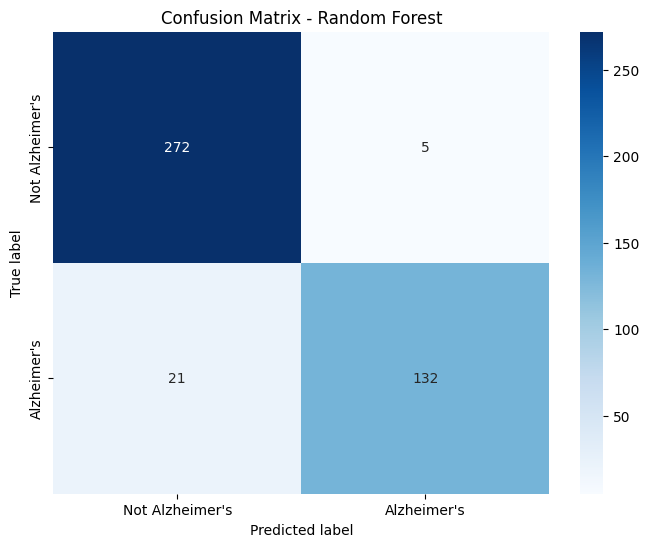

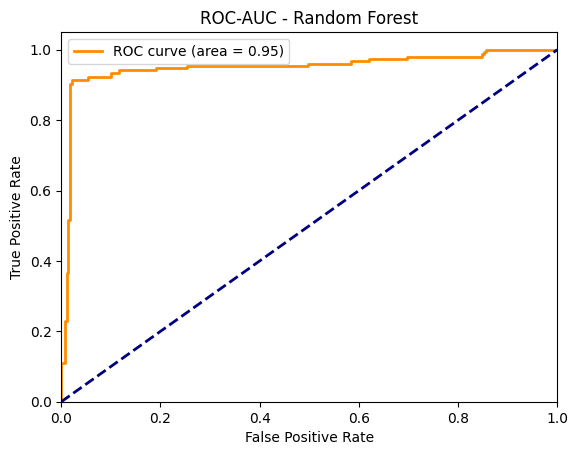

In [26]:
# Create a base Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation on the base model
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Base Random Forest model cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Define the parameter grid to search
grid_parameters={
    "n_estimators":[100,200,300],    # Number of trees
    "max_depth":[10,20,30],          # Maximum depth of each tree
    "min_samples_split":[2,5,10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1,2,4]
}

# Set up GridSearchCV with 5-fold cross-validation
rf_grid_search=GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid= grid_parameters, 
    scoring='accuracy',   # Evaluate performance using accuracy score
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1             # use all available processors to run in parallel
)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters found:", rf_grid_search.best_params_)
print(f"Best cross-validation accuracy: {rf_grid_search.best_score_:.4f}")

# Get the best model
best_rf = rf_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Print test accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest test accuracy: {rf_accuracy:.4f}")

# Print classification report
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',  # annot: display data values; fmt='d': decimal format
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC-AUC
y_probs = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # lw: line width
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC - Random Forest')
plt.legend()
plt.show()

### AdaBoost

c:\Users\HanDong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HanDong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HanDong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HanDong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

Base AdaBoost model cross-validation scores: [0.88081395 0.91860465 0.9244186  0.90697674 0.88629738]
Mean cross-validation accuracy: 0.9034 ± 0.0173

Best parameters found: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
Best cross-validation accuracy: 0.9366
AdaBoost test accuracy: 0.9233

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       277
           1       0.91      0.88      0.89       153

    accuracy                           0.92       430
   macro avg       0.92      0.91      0.92       430
weighted avg       0.92      0.92      0.92       430



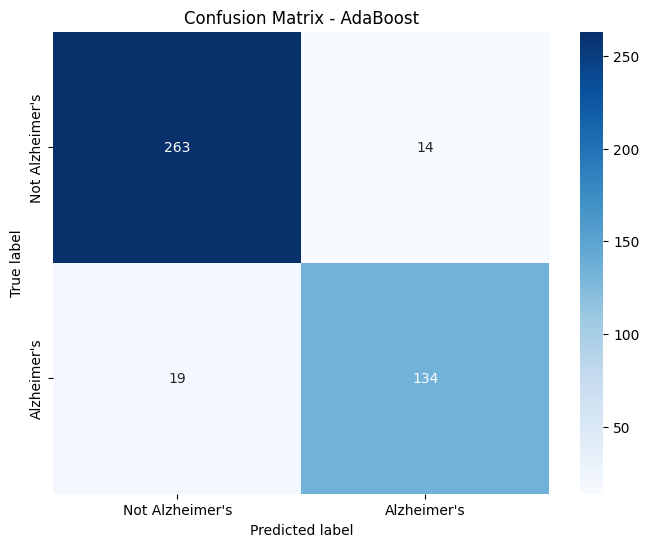

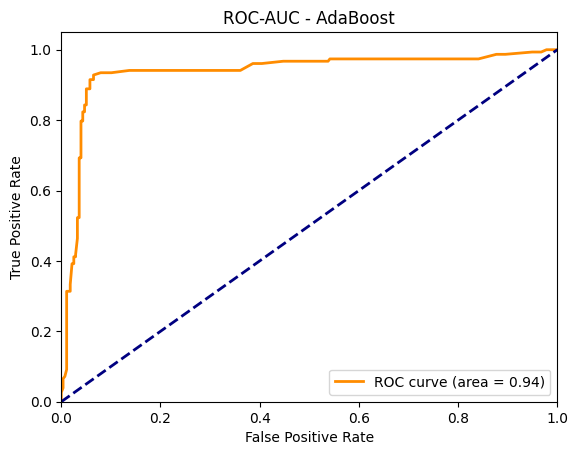

In [27]:
# Create a base AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)

# Perform cross-validation on the base model
cv_scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')
print(f"Base AdaBoost model cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Define the parameter grid to search
grid_parameters={
    'n_estimators': [50, 100, 200],           # Number of weak classifiers
    'learning_rate': [0.01, 0.1, 0.5, 1.0],   # Controls contribution of each classifier
    'algorithm': ['SAMME', 'SAMME.R']         # SAMME.R uses probabilities, SAMME uses class predictions
}

# Set up GridSearchCV with 5-fold cross-validation
ada_grid_search=GridSearchCV(
    estimator=AdaBoostClassifier(), 
    param_grid= grid_parameters, 
    scoring='accuracy',   # Evaluate performance using accuracy score
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1             # use all available processors to run in parallel
)

# Fit the grid search to the data
ada_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters found:", ada_grid_search.best_params_)
print(f"Best cross-validation accuracy: {ada_grid_search.best_score_:.4f}")

# Get the best model
best_ada = ada_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_ada.predict(X_test)

# Print test accuracy
ada_accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost test accuracy: {ada_accuracy:.4f}")

# Print classification report
print("\nClassification Report - AdaBoost:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
ada_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Blues',  # annot: display data values; fmt='d': decimal format
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

# ROC-AUC
y_probs = best_ada.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # lw: line width
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC - AdaBoost')
plt.legend()
plt.show()

### Gradient Boosting

Base Gradient Boosting model cross-validation scores: [0.93313953 0.95639535 0.9505814  0.92732558 0.9271137 ]
Mean cross-validation accuracy: 0.9389 ± 0.0122

Best parameters found: {'learning_rate': 0.5, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9441
Gradient Boosting test accuracy: 0.9512

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



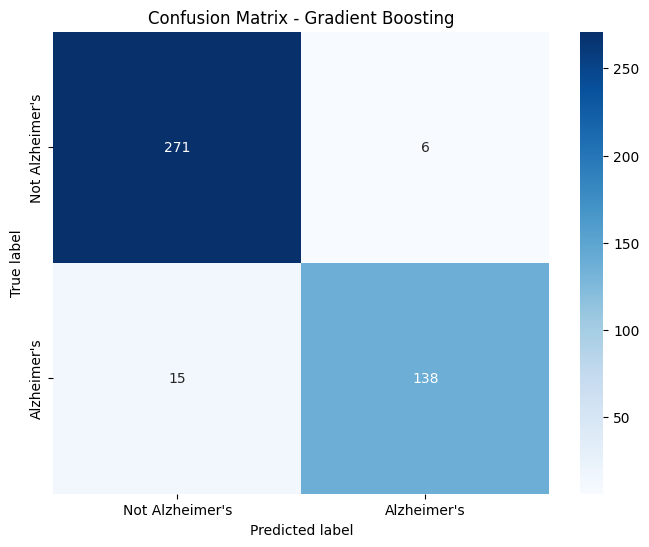

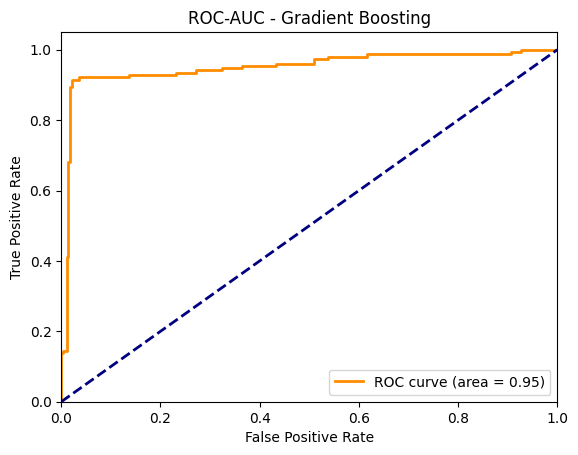

In [28]:
# Create a base Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)

# Perform cross-validation on the base model
cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Base Gradient Boosting model cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Define the parameter grid to search
grid_parameters={
    'n_estimators': [100, 200],           # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],    # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],               # Maximum depth of individual regression estimators
    'min_samples_split': [2, 5],          # Minimum samples required to split an internal node
}

# Set up GridSearchCV with 5-fold cross-validation
gb_grid_search=GridSearchCV(
    estimator=GradientBoostingClassifier(), 
    param_grid= grid_parameters, 
    scoring='accuracy',   # Evaluate performance using accuracy score
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1             # use all available processors to run in parallel
)

# Fit the grid search to the data
gb_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters found:", gb_grid_search.best_params_)
print(f"Best cross-validation accuracy: {gb_grid_search.best_score_:.4f}")

# Get the best model
best_gb = gb_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_gb.predict(X_test)

# Print test accuracy
gb_accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting test accuracy: {gb_accuracy:.4f}")

# Print classification report
print("\nClassification Report - Gradient Boosting:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
gb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues',  # annot: display data values; fmt='d': decimal format
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# ROC-AUC
y_probs = best_gb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # lw: line width
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC - Gradient Boosting')
plt.legend()
plt.show()

### XGBoost

Base XGBoost model cross-validation scores: [0.93023256 0.9622093  0.95348837 0.93895349 0.9271137 ]
Mean cross-validation accuracy: 0.9424 ± 0.0135

Best parameters found: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 100}
Best cross-validation accuracy: 0.9482
XGBoost test accuracy: 0.9558

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



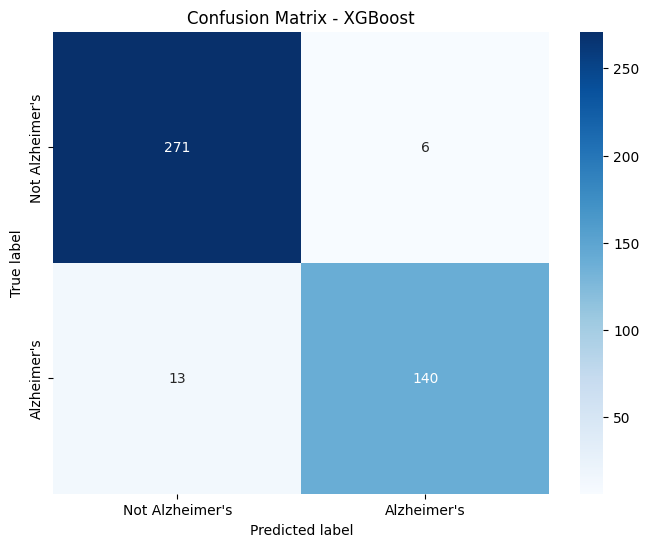

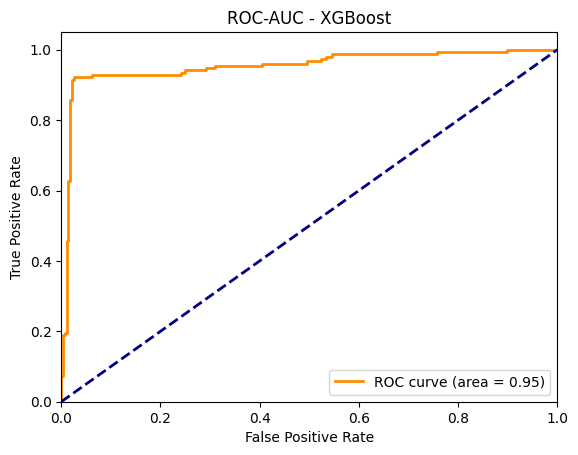

In [29]:
# Create a base XGBoost classifier
xgb = xgboost.XGBClassifier(random_state=42, eval_metric='logloss')

# Perform cross-validation on the base model
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Base XGBoost model cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Define the parameter grid to search
grid_parameters={
    'n_estimators': [100, 200],           # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.3],    # Step size shrinkage to prevent overfitting
    'max_depth': [3, 6, 9],               # Maximum tree depth
    'min_child_weight': [1, 3, 5],        # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.3],               # Minimum loss reduction required for a split
}

# Set up GridSearchCV with 5-fold cross-validation
xgb_grid_search=GridSearchCV(
    estimator=xgboost.XGBClassifier(), 
    param_grid= grid_parameters, 
    scoring='accuracy',   # Evaluate performance using accuracy score
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1             # use all available processors to run in parallel
)

# Fit the grid search to the data
xgb_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters found:", xgb_grid_search.best_params_)
print(f"Best cross-validation accuracy: {xgb_grid_search.best_score_:.4f}")

# Get the best model
best_xgb = xgb_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Print test accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost test accuracy: {xgb_accuracy:.4f}")

# Print classification report
print("\nClassification Report - XGBoost:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',  # annot: display data values; fmt='d': decimal format
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC-AUC
y_probs = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # lw: line width
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC - XGBoost')
plt.legend()
plt.show()

## Compare models

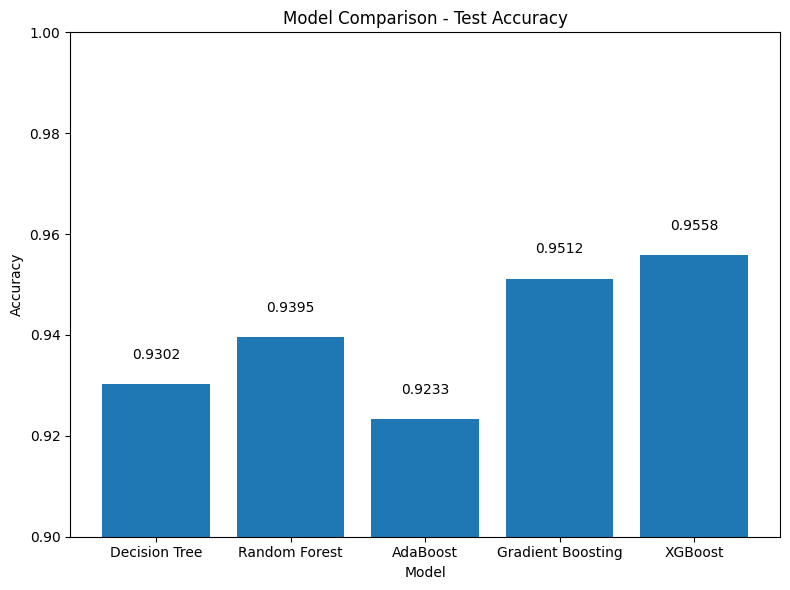

In [30]:
# Compare Models using Accuracy
models_acc = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'AdaBoost': ada_accuracy,
    'Gradient Boosting': gb_accuracy,
    'XGBoost': xgb_accuracy
}

plt.figure(figsize=(8, 6))
plt.bar(models_acc.keys(), models_acc.values())
plt.ylim(0.9, 1.0)  # Adjust based on your actual scores
plt.title('Model Comparison - Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, (model, score) in enumerate(models_acc.items()):
    plt.text(i, score + 0.005, f'{score:.4f}', ha='center')
plt.tight_layout()
plt.show()

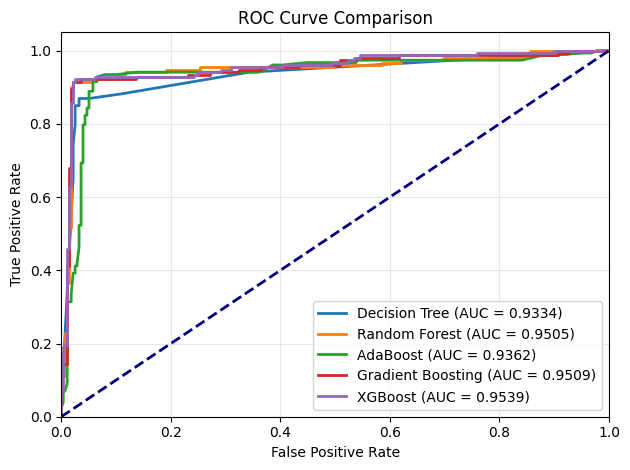

In [31]:
# Compare Models using ROC Curves
models_roc_auc = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'AdaBoost': best_ada,
    'Gradient Boosting': best_gb,
    'XGBoost': best_xgb
}

for name, model in models_roc_auc.items():
    # Get probabilities for positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve points
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

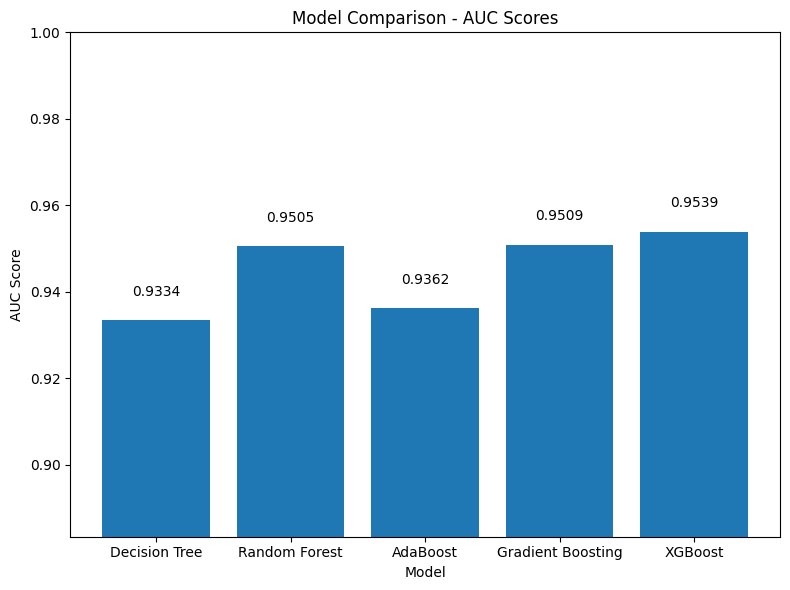

In [32]:
# Compare Models using AUC scores
model_auc_scores = {}
for name, model in models_roc_auc.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    model_auc_scores[name] = roc_auc_score(y_test, y_probs)

# Bar Plot of AUC Scores
plt.figure(figsize=(8,6))
bars = plt.bar(model_auc_scores.keys(), model_auc_scores.values())
plt.ylim(min(model_auc_scores.values()) - 0.05, 1.0)  # Adjust based on actual scores
plt.title('Model Comparison - AUC Scores')
plt.xlabel('Model')
plt.ylabel('AUC Score')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

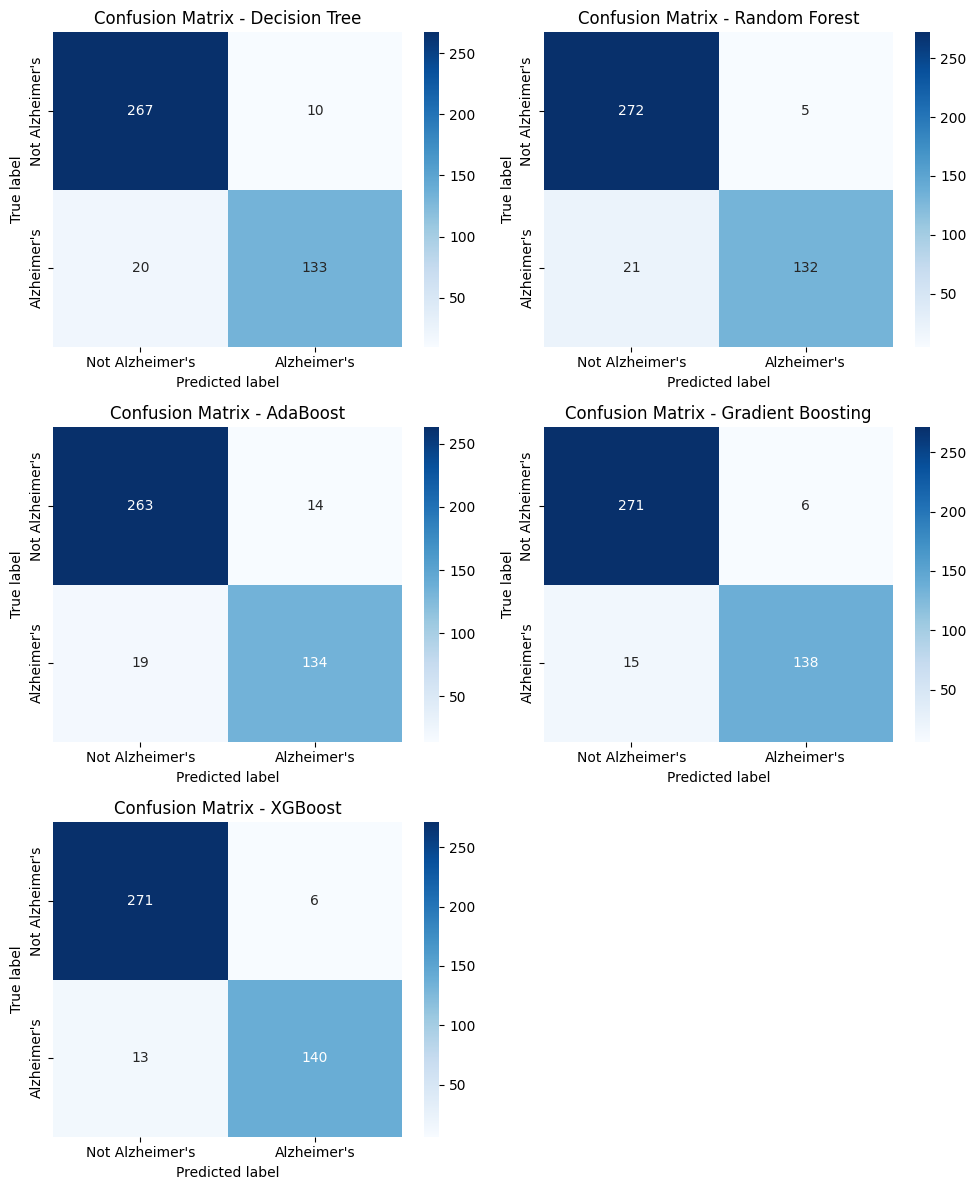

In [33]:
# Compare Models using Confusion Matrix
plt.figure(figsize=(10,12))

plt.subplot(3,2,1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',  
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree')

plt.subplot(3,2,2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',  
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')

plt.subplot(3,2,3)
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - AdaBoost')

plt.subplot(3,2,4)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Gradient Boosting')

plt.subplot(3,2,5)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',  # annot: display data values; fmt='d': decimal format
            xticklabels=["Not Alzheimer's", "Alzheimer's"],
            yticklabels=["Not Alzheimer's", "Alzheimer's"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - XGBoost')

plt.tight_layout()
plt.show()

## Save model

In [34]:
import joblib

# save the model with the highest test accuracy
joblib.dump(best_xgb, 'saved_models/XGBoost.pkl')

['saved_models/XGBoost.pkl']

## Feature importance

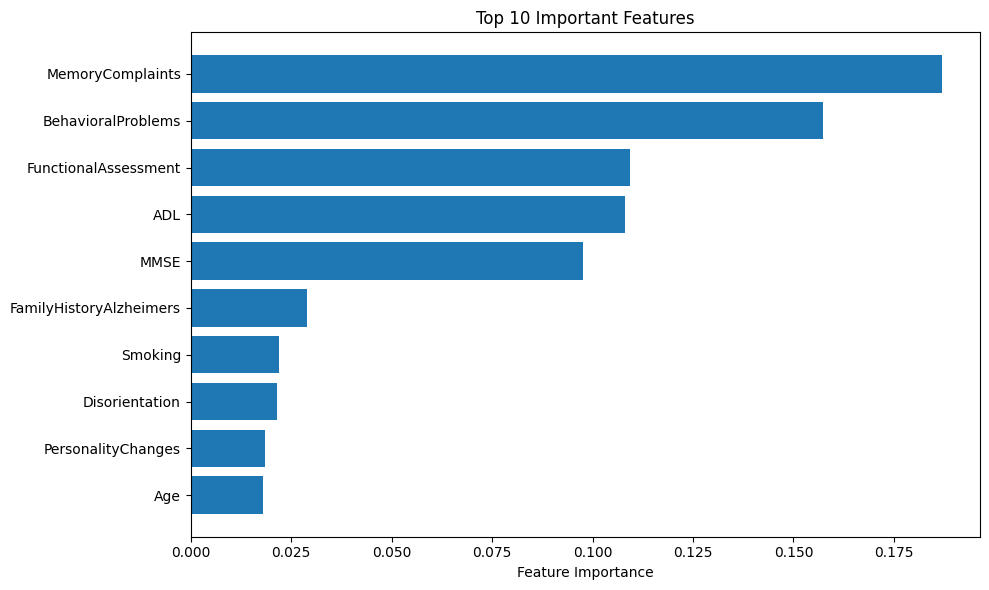

In [35]:
import numpy as np
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]  # Top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

# SHAP

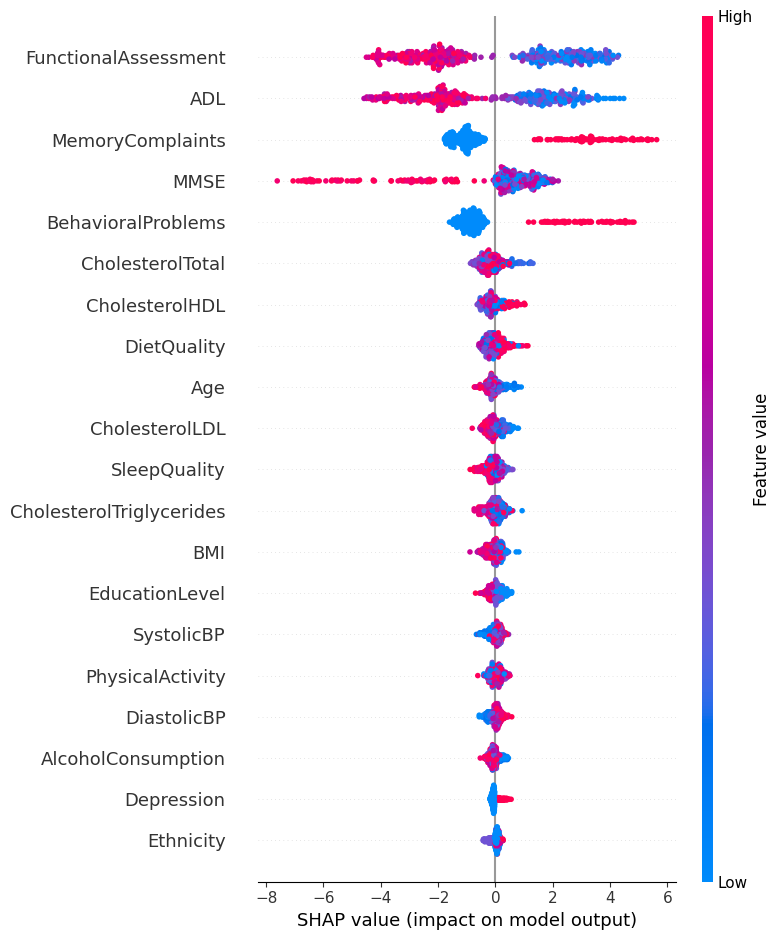

In [36]:
import shap

# Explain model predictions using SHAP for the best model
explainer = shap.Explainer(best_xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

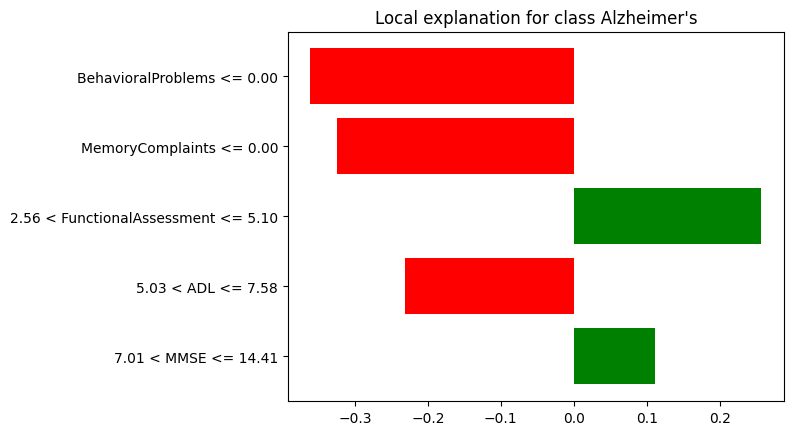

In [37]:
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ["Not Alzheimer's", "Alzheimer's"]

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

# Select an instance to explain
instance_index = 1  # Change this index to select a different instance
instance = X_test.iloc[instance_index].values.reshape(1, -1)

# Predict function should return probability estimates
predict_fn = best_xgb.predict_proba

# Generate explanation for the selected instance
explanation = explainer.explain_instance(instance.flatten(), predict_fn, num_features=5)

explanation.as_pyplot_figure()
plt.show()
